In [2]:
# faced ImportError: cannot import name 'get_submodules_from_kwargs' from 'keras_applications' (/usr/local/lib/python3.7/dist-packages/keras_applications/__init__.py)
#Hence tryign these versions
!pip install tensorflow==1.15
!pip install keras==2.2.1
!pip install keras-applications==1.0.7
!pip install 'h5py==2.10.0' --force-reinstall
!pip install mrcnn


     |████████████████████████████████| 412.3 MB 27 kB/s 
     |████████████████████████████████| 503 kB 44.8 MB/s 
     |████████████████████████████████| 50 kB 6.5 MB/s 
     |████████████████████████████████| 3.8 MB 35.8 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=fc10aa5c9de98786d0853c4efc13e3940a571bfbfe7b0c52936c75e32708c84e
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Succes

     |████████████████████████████████| 299 kB 5.5 MB/s 
     |████████████████████████████████| 43 kB 1.9 MB/s 
  Attempting uninstall: keras-preprocessing
    Found existing installation: Keras-Preprocessing 1.1.2
    Uninstalling Keras-Preprocessing-1.1.2:
      Successfully uninstalled Keras-Preprocessing-1.1.2
  Attempting uninstall: keras-applications
    Found existing installation: Keras-Applications 1.0.8
    Uninstalling Keras-Applications-1.0.8:
      Successfully uninstalled Keras-Applications-1.0.8
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 1.15.0 requires keras-applications>=1.0.8, but you have keras-applications 1.0.4 which is incompatible.
tensorflow 1.15.0 requires keras-preprocessin

     |████████████████████████████████| 51 kB 529 kB/s 
  Attempting uninstall: keras-applications
    Found existing installation: Keras-Applications 1.0.4
    Uninstalling Keras-Applications-1.0.4:
      Successfully uninstalled Keras-Applications-1.0.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 1.15.0 requires keras-applications>=1.0.8, but you have keras-applications 1.0.7 which is incompatible.
tensorflow 1.15.0 requires keras-preprocessing>=1.0.5, but you have keras-preprocessing 1.0.2 which is incompatible.
keras 2.2.1 requires keras-applications==1.0.4, but you have keras-applications 1.0.7 which is incompatible.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.15.0 which is incompatible.
     |████████████████████████████████| 2.9 MB 5.3 MB/s 
     |████████████████████████████████| 15.7 MB 34.3 MB/s 
  Attempting unins

     |████████████████████████████████| 51 kB 251 kB/s 
  Created wheel for mrcnn: filename=mrcnn-0.2-py3-none-any.whl size=54932 sha256=993b287f721c2aef35ba5487e266ce800bbb1b75f28519ceb411f8a7fc11735d
  Stored in directory: /root/.cache/pip/wheels/1d/94/0d/03ff96abc43d2d6c8299a92cbb4eced2a1eda3ca7911c19427
Successfully built mrcnn


In [1]:
# making tensorflow==1.15 and keras==2.3.0 to resolve mrcnn import issue 
#AttributeError: module 'keras.engine' has no attribute 'Layer'

#!pip install tensorflow==1.15
#!pip install keras==2.3.0
#2.3.0
import tensorflow as tf
import keras 
print(tf.__version__)
print(keras.__version__)
#!pip install mrcnn
from mrcnn.utils import Dataset,extract_bboxes
from mrcnn.visualize import display_instances
from mrcnn.config import Config
from mrcnn.utils import compute_ap
from mrcnn.model import MaskRCNN
from mrcnn.model import load_image_gt
from mrcnn.model import mold_image

Using TensorFlow backend.


1.15.0
2.2.1


In [2]:
import pandas as pd
import numpy as np
import os,sys
from os import listdir
from numpy import zeros, asarray, expand_dims, mean
from matplotlib import pyplot

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
project_path = '/content/drive/MyDrive/AIML/Capstone/Dataset/'

In [5]:
bb_df = pd.read_csv(project_path+'Annotations/Train Annotations.csv')
bb_df.head()

,Image Name,Bounding Box coordinates,Unnamed: 2,Unnamed: 3,Unnamed: 4,Image class
0,00001.jpg,39,116,569,375,14
1,00002.jpg,36,116,868,587,3
2,00003.jpg,85,109,601,381,91
3,00004.jpg,621,393,1484,1096,134
4,00005.jpg,14,36,133,99,106


In [6]:
all_folders_train= os.listdir(project_path+'Car Images/Train Images')
all_folders_test= os.listdir(project_path+'Car Images/Test Images')

In [7]:
 distiList_train=[]
 labelList_train=[]
 for i in all_folders_train:
  if not i.startswith('.') :
    eachFolder=os.listdir(project_path+'Car Images/Train Images/'+i)
    distiList_train.append(len(eachFolder))
    labelList_train.append(i)


In [8]:
print('Number of Images in each category of car in train list')
print(distiList_train)

Number of Images in each category of car in train list
[42, 43, 32, 39, 45, 41, 33, 45, 41, 45, 43, 38, 37, 43, 41, 41, 45, 40, 43, 42, 40, 46, 43, 39, 44, 41, 46, 37, 45, 35, 36, 41, 43, 36, 42, 44, 41, 34, 41, 45, 39, 44, 42, 42, 41, 33, 35, 38, 43, 42, 45, 41, 43, 45, 40, 38, 45, 42, 30, 47, 37, 35, 45, 45, 39, 43, 43, 44, 44, 40, 49, 44, 37, 44, 40, 38, 43, 41, 45, 44, 42, 45, 41, 38, 39, 42, 39, 41, 41, 44, 44, 44, 40, 46, 43, 44, 40, 46, 40, 43, 39, 28, 42, 34, 38, 44, 43, 45, 43, 45, 43, 45, 44, 42, 45, 40, 42, 45, 46, 45, 42, 39, 68, 43, 24, 42, 39, 39, 44, 41, 42, 44, 42, 43, 42, 44, 40, 41, 42, 34, 34, 35, 40, 47, 44, 44, 45, 51, 46, 43, 52, 37, 43, 36, 44, 36, 29, 44, 45, 48, 44, 37, 46, 45, 46, 42, 50, 41, 44, 37, 46, 39, 44, 41, 39, 42, 31, 44, 45, 43, 40, 46, 42, 38, 41, 39, 44, 41, 49, 44, 39, 43, 43, 46, 43, 42]


In [9]:
class CarsDataset(Dataset):
    '''
    Dataset class to load the images and their bounding boxes in the form of masks
    '''
    def load_dataset(self, dataset_dir=project_path+'Car Images', mode='train'):
        '''
        This function is used to load the dataset. We will only use 500 images for training the rest are for validation.
        We also have test set for which we dont have labels but are useful for visually checking 
        for how effective the training was
        '''
        self.add_class('dataset',1,'car')
        if mode=='train':
            images_dir = dataset_dir + '/Train Images/'
            eachFolder_train = []
            for i in all_folders_train:
              if not i.startswith('.') :
                eachFolder_train=os.listdir(images_dir+i)
              for eachFile_id in eachFolder_train:
                if not eachFile_id.startswith('.') :
                  img_path = images_dir+i+'/' + eachFile_id
                  image_id = eachFile_id
                  self.add_image('dataset', image_id=image_id, path=img_path)
            #for i in range(500):
             #   image_id = bb_df.iloc[i,0]
              #  img_path = images_dir + image_id
               # self.add_image('dataset', image_id=image_id, path=img_path)
        '''if mode=='val':
            images_dir = dataset_dir + '/Train Images/'
            for i in range(200,len(bb_df)):
                image_id = bb_df.iloc[i,0]
                img_path = images_dir + image_id
                self.add_image('dataset', image_id=image_id, path=img_path)'''
        if mode=='test':
            images_dir = dataset_dir + '/Test Images/'
            eachFolder_test =[]
            for i in all_folders_test:
              if not i.startswith('.') :
                eachFolder_test=os.listdir(images_dir+i)
                countTest=0
              for eachFile_id in eachFolder_test:
                if not eachFile_id.startswith('.') and countTest <20:
                  img_path = images_dir+i+'/' + eachFile_id
                  image_id = eachFile_id
                  self.add_image('dataset', image_id=image_id, path=img_path)
                  countTest = countTest+1
                ''' for filename in listdir(images_dir):
                image_id = filename
                img_path = images_dir + filename
                self.add_image('dataset', image_id=image_id, path=img_path)'''
        
    def extract_boxes(self, filename):
        '''
        To get the coordinates of the bounding boxes.
        '''
        boxes = list()
        xmin = int(bb_df[bb_df['Image Name']==filename].iloc[0,1])
        ymin = int(bb_df[bb_df['Image Name']==filename].iloc[0,2])
        xmax = int(bb_df[bb_df['Image Name']==filename].iloc[0,3])
        ymax = int(bb_df[bb_df['Image Name']==filename].iloc[0,4])
        coors = [xmin, ymin, xmax, ymax]
        boxes.append(coors)
        width = xmax-xmin # 380
        height = ymax-ymin## 676
        return boxes, width, height
    def load_mask(self, image_id):
        '''
        Takes the co-ordinates and uses that to make it into a mask.
        '''
        info = self.image_info[image_id]
        file = info['id']
        boxes, w, h = self.extract_boxes(file)
        masks = zeros([w, h, len(boxes)], dtype='uint8')
        class_ids = list()
        for i in range(len(boxes)):
            box = boxes[i]
            row_s, row_e = box[1], box[3]
            col_s, col_e = box[0], box[2]
            masks[row_s:row_e, col_s:col_e, i] = 1
            class_ids.append(self.class_names.index('car'))
        return masks, asarray(class_ids, dtype='int32')
    
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']

In [10]:
train_set = CarsDataset()
train_set.load_dataset(mode='train')
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))

val_set = CarsDataset()
val_set.load_dataset(mode='val')
val_set.prepare()
print('Validate: %d' % len(val_set.image_ids))
 
test_set = CarsDataset()
test_set.load_dataset(mode='test')
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))

Train: 8177
Validate: 0
Test: 3920


In [89]:
def plot(num_img=5):
    for i in range(num_img):
        image_id = np.random.randint(0,len(train_set.image_ids))
        image = train_set.load_image(image_id)
        print(image.shape)
        mask, class_ids = train_set.load_mask(image_id)
        print(mask.shape)
        pyplot.imshow(image)
        pyplot.imshow(mask[:, :, 0], cmap='gray', alpha=0.3)
        pyplot.show()

(320, 400, 3)
(380, 676, 1)


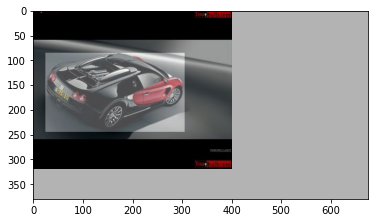

(1200, 1600, 3)
(380, 676, 1)


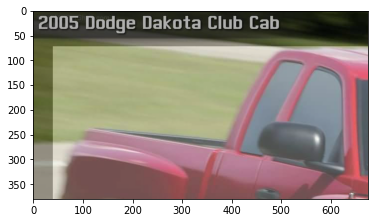

(1200, 1600, 3)
(380, 676, 1)


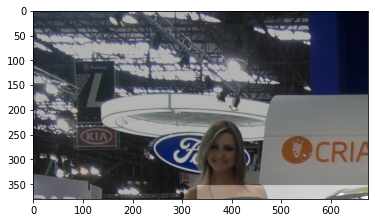

(468, 625, 3)
(380, 676, 1)


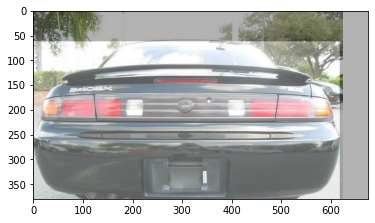

(234, 611, 3)
(380, 676, 1)


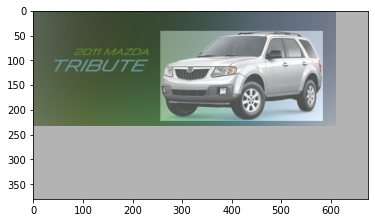

In [90]:
plot()

In [13]:
class CarsConfig(Config):
    NAME = "cars_cfg"
    NUM_CLASSES = 2 #Bckground is counted as class too so background + cars = 2 labels
    STEPS_PER_EPOCH = 70
    VALIDATION_STEPS = 20
    IMAGES_PER_GPU = 1
    IMAGE_MIN_DIM = 256
    #384
    IMAGE_MAX_DIM = 256
    #448
    
config = CarsConfig()

In [19]:
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  256
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  256
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [256 256   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTANCES

In [22]:
model = MaskRCNN(mode='training', model_dir='./', config=config)

In [23]:
#Downgrading h5py to resolve AttributeError: 'str' object has no attribute 'decode'
#!pip install 'h5py==2.10.0' --force-reinstall
model.load_weights('/content/drive/MyDrive/AIML/Capstone/mask_rcnn_coco.h5', by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])


In [24]:
#!pip install 'keras==2.2.5' --force-reinstall
#to resolve eblow issue downgarding keras to 2.2.5 pip install 'keras==2.2.5' --force-reinstall
#AttributeError: 'Model' object has no attribute 'metrics_tensors'

model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=10, layers='all')


Starting at epoch 0. LR=0.001

Checkpoint Path: ./cars_cfg20220304T0759/mask_rcnn_cars_cfg_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2b         (Conv2D)
bn3a_branch2b          (BatchNo

/usr/local/lib/python3.7/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.7/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.7/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


/usr/local/lib/python3.7/dist-packages/keras/engine/training_generator.py:46: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'




Epoch 1/10


/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. 

 2/70 [..............................] - ETA: 32:58 - loss: 3.6154 - rpn_class_loss: 0.0558 - rpn_bbox_loss: 1.2632 - mrcnn_class_loss: 0.9568 - mrcnn_bbox_loss: 0.4962 - mrcnn_mask_loss: 0.8434  

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 4/70 [>.............................] - ETA: 16:21 - loss: 3.2531 - rpn_class_loss: 0.0334 - rpn_bbox_loss: 0.6473 - mrcnn_class_loss: 0.5575 - mrcnn_bbox_loss: 0.7065 - mrcnn_mask_loss: 1.3084

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 6/70 [=>............................] - ETA: 10:48 - loss: 3.0668 - rpn_class_loss: 0.0237 - rpn_bbox_loss: 0.4384 - mrcnn_class_loss: 0.3991 - mrcnn_bbox_loss: 0.7715 - mrcnn_mask_loss: 1.4342

ERROR:root:Error processing image {'id': '04295 (1).jpg', 'source': 'dataset', 'path': '/content/drive/MyDrive/AIML/Capstone/Dataset/Car Images/Train Images/Lamborghini Diablo Coupe 2001/04295 (1).jpg'}
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/mrcnn/model.py", line 1704, in data_generator
    use_mini_mask=config.USE_MINI_MASK)
  File "/usr/local/lib/python3.7/dist-packages/mrcnn/model.py", line 1219, in load_image_gt
    mask, class_ids = dataset.load_mask(image_id)
  File "<ipython-input-9-7c3c4edbac74>", line 71, in load_mask
    boxes, w, h = self.extract_boxes(file)
  File "<ipython-input-9-7c3c4edbac74>", line 56, in extract_boxes
    xmin = int(bb_df[bb_df['Image Name']==filename].iloc[0,1])
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py", line 925, in __getitem__
    return self._getitem_tuple(key)
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py", line 1506, in _getitem_tuple
    self._has_v

 8/70 [==>...........................] - ETA: 8:01 - loss: 3.3787 - rpn_class_loss: 0.0274 - rpn_bbox_loss: 0.9096 - mrcnn_class_loss: 0.3114 - mrcnn_bbox_loss: 0.7756 - mrcnn_mask_loss: 1.3547

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


10/70 [===>..........................] - ETA: 6:20 - loss: 3.0747 - rpn_class_loss: 0.0220 - rpn_bbox_loss: 0.7334 - mrcnn_class_loss: 0.2565 - mrcnn_bbox_loss: 0.7244 - mrcnn_mask_loss: 1.3385

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


11/70 [===>..........................] - ETA: 5:43 - loss: 3.0541 - rpn_class_loss: 0.0221 - rpn_bbox_loss: 0.7285 - mrcnn_class_loss: 0.2336 - mrcnn_bbox_loss: 0.7596 - mrcnn_mask_loss: 1.3103

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


12/70 [====>.........................] - ETA: 5:12 - loss: 2.9713 - rpn_class_loss: 0.0206 - rpn_bbox_loss: 0.6836 - mrcnn_class_loss: 0.2151 - mrcnn_bbox_loss: 0.7411 - mrcnn_mask_loss: 1.3108

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


13/70 [====>.........................] - ETA: 4:46 - loss: 2.8790 - rpn_class_loss: 0.0192 - rpn_bbox_loss: 0.6338 - mrcnn_class_loss: 0.2005 - mrcnn_bbox_loss: 0.7305 - mrcnn_mask_loss: 1.2950

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


14/70 [=====>........................] - ETA: 4:24 - loss: 3.1169 - rpn_class_loss: 0.0189 - rpn_bbox_loss: 0.9216 - mrcnn_class_loss: 0.1934 - mrcnn_bbox_loss: 0.7255 - mrcnn_mask_loss: 1.2574

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


15/70 [=====>........................] - ETA: 4:04 - loss: 3.0074 - rpn_class_loss: 0.0183 - rpn_bbox_loss: 0.8628 - mrcnn_class_loss: 0.1816 - mrcnn_bbox_loss: 0.7065 - mrcnn_mask_loss: 1.2382

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


16/70 [=====>........................] - ETA: 3:47 - loss: 2.9100 - rpn_class_loss: 0.0172 - rpn_bbox_loss: 0.8097 - mrcnn_class_loss: 0.1719 - mrcnn_bbox_loss: 0.7057 - mrcnn_mask_loss: 1.2055

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


18/70 [======>.......................] - ETA: 3:18 - loss: 2.7474 - rpn_class_loss: 0.0170 - rpn_bbox_loss: 0.8179 - mrcnn_class_loss: 0.1530 - mrcnn_bbox_loss: 0.6390 - mrcnn_mask_loss: 1.1205

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


19/70 [=======>......................] - ETA: 3:05 - loss: 2.6826 - rpn_class_loss: 0.0162 - rpn_bbox_loss: 0.7843 - mrcnn_class_loss: 0.1452 - mrcnn_bbox_loss: 0.6268 - mrcnn_mask_loss: 1.1100

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


20/70 [=======>......................] - ETA: 2:54 - loss: 2.6100 - rpn_class_loss: 0.0154 - rpn_bbox_loss: 0.7473 - mrcnn_class_loss: 0.1389 - mrcnn_bbox_loss: 0.6297 - mrcnn_mask_loss: 1.0787

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. 

22/70 [========>.....................] - ETA: 2:35 - loss: 2.4656 - rpn_class_loss: 0.0146 - rpn_bbox_loss: 0.6850 - mrcnn_class_loss: 0.1281 - mrcnn_bbox_loss: 0.6049 - mrcnn_mask_loss: 1.0331

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


23/70 [========>.....................] - ETA: 2:26 - loss: 2.4220 - rpn_class_loss: 0.0139 - rpn_bbox_loss: 0.6663 - mrcnn_class_loss: 0.1234 - mrcnn_bbox_loss: 0.6059 - mrcnn_mask_loss: 1.0125

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


25/70 [=========>....................] - ETA: 2:11 - loss: 2.3538 - rpn_class_loss: 0.0134 - rpn_bbox_loss: 0.6394 - mrcnn_class_loss: 0.1141 - mrcnn_bbox_loss: 0.6075 - mrcnn_mask_loss: 0.9794

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


27/70 [==========>...................] - ETA: 1:58 - loss: 2.9896 - rpn_class_loss: 0.0142 - rpn_bbox_loss: 1.3362 - mrcnn_class_loss: 0.1063 - mrcnn_bbox_loss: 0.6109 - mrcnn_mask_loss: 0.9219

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


29/70 [===========>..................] - ETA: 1:47 - loss: 2.8859 - rpn_class_loss: 0.0146 - rpn_bbox_loss: 1.2496 - mrcnn_class_loss: 0.1008 - mrcnn_bbox_loss: 0.6280 - mrcnn_mask_loss: 0.8929

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


31/70 [============>.................] - ETA: 1:37 - loss: 2.7766 - rpn_class_loss: 0.0145 - rpn_bbox_loss: 1.1775 - mrcnn_class_loss: 0.0964 - mrcnn_bbox_loss: 0.6263 - mrcnn_mask_loss: 0.8619

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


33/70 [=============>................] - ETA: 1:27 - loss: 2.7026 - rpn_class_loss: 0.0137 - rpn_bbox_loss: 1.1211 - mrcnn_class_loss: 0.0921 - mrcnn_bbox_loss: 0.6331 - mrcnn_mask_loss: 0.8425

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


35/70 [==============>...............] - ETA: 1:19 - loss: 3.3411 - rpn_class_loss: 0.0162 - rpn_bbox_loss: 1.8187 - mrcnn_class_loss: 0.0876 - mrcnn_bbox_loss: 0.6122 - mrcnn_mask_loss: 0.8064

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


37/70 [==============>...............] - ETA: 1:12 - loss: 3.2234 - rpn_class_loss: 0.0154 - rpn_bbox_loss: 1.7267 - mrcnn_class_loss: 0.0844 - mrcnn_bbox_loss: 0.6086 - mrcnn_mask_loss: 0.7883

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


39/70 [===============>..............] - ETA: 1:05 - loss: 3.1181 - rpn_class_loss: 0.0147 - rpn_bbox_loss: 1.6509 - mrcnn_class_loss: 0.0816 - mrcnn_bbox_loss: 0.6019 - mrcnn_mask_loss: 0.7690

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


41/70 [================>.............] - ETA: 59s - loss: 3.0110 - rpn_class_loss: 0.0144 - rpn_bbox_loss: 1.5789 - mrcnn_class_loss: 0.0785 - mrcnn_bbox_loss: 0.5882 - mrcnn_mask_loss: 0.7510 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


43/70 [=================>............] - ETA: 53s - loss: 2.8988 - rpn_class_loss: 0.0139 - rpn_bbox_loss: 1.5083 - mrcnn_class_loss: 0.0758 - mrcnn_bbox_loss: 0.5685 - mrcnn_mask_loss: 0.7323

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


45/70 [==================>...........] - ETA: 47s - loss: 2.7982 - rpn_class_loss: 0.0141 - rpn_bbox_loss: 1.4433 - mrcnn_class_loss: 0.0734 - mrcnn_bbox_loss: 0.5531 - mrcnn_mask_loss: 0.7144

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


47/70 [===================>..........] - ETA: 42s - loss: 2.7068 - rpn_class_loss: 0.0140 - rpn_bbox_loss: 1.3868 - mrcnn_class_loss: 0.0710 - mrcnn_bbox_loss: 0.5371 - mrcnn_mask_loss: 0.6978

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


49/70 [====================>.........] - ETA: 38s - loss: 2.6301 - rpn_class_loss: 0.0135 - rpn_bbox_loss: 1.3342 - mrcnn_class_loss: 0.0688 - mrcnn_bbox_loss: 0.5315 - mrcnn_mask_loss: 0.6821

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


50/70 [====================>.........] - ETA: 35s - loss: 2.5916 - rpn_class_loss: 0.0133 - rpn_bbox_loss: 1.3090 - mrcnn_class_loss: 0.0679 - mrcnn_bbox_loss: 0.5264 - mrcnn_mask_loss: 0.6749

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


52/70 [=====================>........] - ETA: 31s - loss: 2.7661 - rpn_class_loss: 0.0141 - rpn_bbox_loss: 1.5008 - mrcnn_class_loss: 0.0666 - mrcnn_bbox_loss: 0.5229 - mrcnn_mask_loss: 0.6618

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


53/70 [=====================>........] - ETA: 29s - loss: 2.7399 - rpn_class_loss: 0.0143 - rpn_bbox_loss: 1.4979 - mrcnn_class_loss: 0.0653 - mrcnn_bbox_loss: 0.5130 - mrcnn_mask_loss: 0.6493

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


55/70 [======================>.......] - ETA: 25s - loss: 2.6889 - rpn_class_loss: 0.0144 - rpn_bbox_loss: 1.4756 - mrcnn_class_loss: 0.0638 - mrcnn_bbox_loss: 0.5030 - mrcnn_mask_loss: 0.6321

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


57/70 [=======================>......] - ETA: 21s - loss: 2.6323 - rpn_class_loss: 0.0142 - rpn_bbox_loss: 1.4346 - mrcnn_class_loss: 0.0629 - mrcnn_bbox_loss: 0.5016 - mrcnn_mask_loss: 0.6190

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


59/70 [========================>.....] - ETA: 17s - loss: 2.5646 - rpn_class_loss: 0.0139 - rpn_bbox_loss: 1.3870 - mrcnn_class_loss: 0.0617 - mrcnn_bbox_loss: 0.4955 - mrcnn_mask_loss: 0.6064

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


60/70 [========================>.....] - ETA: 15s - loss: 2.5329 - rpn_class_loss: 0.0138 - rpn_bbox_loss: 1.3675 - mrcnn_class_loss: 0.0612 - mrcnn_bbox_loss: 0.4898 - mrcnn_mask_loss: 0.6006

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


61/70 [=========================>....] - ETA: 14s - loss: 2.5025 - rpn_class_loss: 0.0139 - rpn_bbox_loss: 1.3474 - mrcnn_class_loss: 0.0607 - mrcnn_bbox_loss: 0.4851 - mrcnn_mask_loss: 0.5954

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


62/70 [=========================>....] - ETA: 12s - loss: 2.5056 - rpn_class_loss: 0.0140 - rpn_bbox_loss: 1.3303 - mrcnn_class_loss: 0.0623 - mrcnn_bbox_loss: 0.4984 - mrcnn_mask_loss: 0.6005

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


63/70 [==========================>...] - ETA: 10s - loss: 2.4749 - rpn_class_loss: 0.0139 - rpn_bbox_loss: 1.3102 - mrcnn_class_loss: 0.0617 - mrcnn_bbox_loss: 0.4945 - mrcnn_mask_loss: 0.5946

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


65/70 [==========================>...] - ETA: 7s - loss: 2.4173 - rpn_class_loss: 0.0139 - rpn_bbox_loss: 1.2735 - mrcnn_class_loss: 0.0607 - mrcnn_bbox_loss: 0.4855 - mrcnn_mask_loss: 0.5836

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


67/70 [===========================>..] - ETA: 4s - loss: 2.3631 - rpn_class_loss: 0.0140 - rpn_bbox_loss: 1.2382 - mrcnn_class_loss: 0.0595 - mrcnn_bbox_loss: 0.4772 - mrcnn_mask_loss: 0.5741

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


69/70 [============================>.] - ETA: 1s - loss: 2.3103 - rpn_class_loss: 0.0138 - rpn_bbox_loss: 1.2031 - mrcnn_class_loss: 0.0584 - mrcnn_bbox_loss: 0.4700 - mrcnn_mask_loss: 0.5651

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. 

70/70 [==============================] - 110s 2s/step - loss: 2.2893 - rpn_class_loss: 0.0137 - rpn_bbox_loss: 1.1883 - mrcnn_class_loss: 0.0578 - mrcnn_bbox_loss: 0.4667 - mrcnn_mask_loss: 0.5628 - val_loss: 2.6553 - val_rpn_class_loss: 0.0345 - val_rpn_bbox_loss: 1.3080 - val_mrcnn_class_loss: 0.1685 - val_mrcnn_bbox_loss: 0.6962 - val_mrcnn_mask_loss: 0.4480



/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. 

Epoch 2/10
 1/70 [..............................] - ETA: 50s - loss: 0.5989 - rpn_class_loss: 0.0052 - rpn_bbox_loss: 0.1595 - mrcnn_class_loss: 0.0090 - mrcnn_bbox_loss: 0.1488 - mrcnn_mask_loss: 0.2764

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 3/70 [>.............................] - ETA: 45s - loss: 0.6232 - rpn_class_loss: 0.0075 - rpn_bbox_loss: 0.0722 - mrcnn_class_loss: 0.0168 - mrcnn_bbox_loss: 0.2704 - mrcnn_mask_loss: 0.2562

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 4/70 [>.............................] - ETA: 43s - loss: 0.5489 - rpn_class_loss: 0.0058 - rpn_bbox_loss: 0.0581 - mrcnn_class_loss: 0.0136 - mrcnn_bbox_loss: 0.2264 - mrcnn_mask_loss: 0.2451

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 6/70 [=>............................] - ETA: 41s - loss: 0.4892 - rpn_class_loss: 0.0043 - rpn_bbox_loss: 0.0505 - mrcnn_class_loss: 0.0114 - mrcnn_bbox_loss: 0.1800 - mrcnn_mask_loss: 0.2430

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 7/70 [==>...........................] - ETA: 41s - loss: 0.4810 - rpn_class_loss: 0.0073 - rpn_bbox_loss: 0.0520 - mrcnn_class_loss: 0.0111 - mrcnn_bbox_loss: 0.1739 - mrcnn_mask_loss: 0.2366

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 9/70 [==>...........................] - ETA: 39s - loss: 0.4856 - rpn_class_loss: 0.0075 - rpn_bbox_loss: 0.0506 - mrcnn_class_loss: 0.0118 - mrcnn_bbox_loss: 0.1855 - mrcnn_mask_loss: 0.2302

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


10/70 [===>..........................] - ETA: 38s - loss: 0.4894 - rpn_class_loss: 0.0069 - rpn_bbox_loss: 0.0477 - mrcnn_class_loss: 0.0107 - mrcnn_bbox_loss: 0.1949 - mrcnn_mask_loss: 0.2292

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


12/70 [====>.........................] - ETA: 37s - loss: 0.4747 - rpn_class_loss: 0.0058 - rpn_bbox_loss: 0.0471 - mrcnn_class_loss: 0.0109 - mrcnn_bbox_loss: 0.1839 - mrcnn_mask_loss: 0.2270

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


14/70 [=====>........................] - ETA: 36s - loss: 0.4938 - rpn_class_loss: 0.0064 - rpn_bbox_loss: 0.0691 - mrcnn_class_loss: 0.0117 - mrcnn_bbox_loss: 0.1796 - mrcnn_mask_loss: 0.2270

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


16/70 [=====>........................] - ETA: 34s - loss: 0.5049 - rpn_class_loss: 0.0057 - rpn_bbox_loss: 0.0709 - mrcnn_class_loss: 0.0113 - mrcnn_bbox_loss: 0.1801 - mrcnn_mask_loss: 0.2368

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


18/70 [======>.......................] - ETA: 33s - loss: 0.4949 - rpn_class_loss: 0.0054 - rpn_bbox_loss: 0.0684 - mrcnn_class_loss: 0.0111 - mrcnn_bbox_loss: 0.1749 - mrcnn_mask_loss: 0.2351

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


20/70 [=======>......................] - ETA: 32s - loss: 0.5456 - rpn_class_loss: 0.0052 - rpn_bbox_loss: 0.0883 - mrcnn_class_loss: 0.0109 - mrcnn_bbox_loss: 0.2009 - mrcnn_mask_loss: 0.2403

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


22/70 [========>.....................] - ETA: 30s - loss: 0.5401 - rpn_class_loss: 0.0048 - rpn_bbox_loss: 0.0917 - mrcnn_class_loss: 0.0100 - mrcnn_bbox_loss: 0.1995 - mrcnn_mask_loss: 0.2340

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


23/70 [========>.....................] - ETA: 30s - loss: 0.5299 - rpn_class_loss: 0.0047 - rpn_bbox_loss: 0.0890 - mrcnn_class_loss: 0.0097 - mrcnn_bbox_loss: 0.1936 - mrcnn_mask_loss: 0.2329

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


24/70 [=========>....................] - ETA: 29s - loss: 0.5341 - rpn_class_loss: 0.0046 - rpn_bbox_loss: 0.1008 - mrcnn_class_loss: 0.0094 - mrcnn_bbox_loss: 0.1895 - mrcnn_mask_loss: 0.2298

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


25/70 [=========>....................] - ETA: 29s - loss: 0.5384 - rpn_class_loss: 0.0044 - rpn_bbox_loss: 0.1011 - mrcnn_class_loss: 0.0096 - mrcnn_bbox_loss: 0.1953 - mrcnn_mask_loss: 0.2280

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


27/70 [==========>...................] - ETA: 27s - loss: 0.5447 - rpn_class_loss: 0.0042 - rpn_bbox_loss: 0.0980 - mrcnn_class_loss: 0.0091 - mrcnn_bbox_loss: 0.2058 - mrcnn_mask_loss: 0.2276

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


29/70 [===========>..................] - ETA: 26s - loss: 0.6029 - rpn_class_loss: 0.0039 - rpn_bbox_loss: 0.1150 - mrcnn_class_loss: 0.0086 - mrcnn_bbox_loss: 0.2171 - mrcnn_mask_loss: 0.2583

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


30/70 [===========>..................] - ETA: 25s - loss: 0.6068 - rpn_class_loss: 0.0038 - rpn_bbox_loss: 0.1195 - mrcnn_class_loss: 0.0087 - mrcnn_bbox_loss: 0.2174 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


32/70 [============>.................] - ETA: 24s - loss: 0.7919 - rpn_class_loss: 0.0049 - rpn_bbox_loss: 0.3244 - mrcnn_class_loss: 0.0082 - mrcnn_bbox_loss: 0.2067 - mrcnn_mask_loss: 0.2478

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


34/70 [=============>................] - ETA: 23s - loss: 0.9516 - rpn_class_loss: 0.0061 - rpn_bbox_loss: 0.5013 - mrcnn_class_loss: 0.0078 - mrcnn_bbox_loss: 0.1964 - mrcnn_mask_loss: 0.2400

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


35/70 [==============>...............] - ETA: 22s - loss: 0.9480 - rpn_class_loss: 0.0060 - rpn_bbox_loss: 0.4904 - mrcnn_class_loss: 0.0078 - mrcnn_bbox_loss: 0.2033 - mrcnn_mask_loss: 0.2406

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


37/70 [==============>...............] - ETA: 21s - loss: 0.9534 - rpn_class_loss: 0.0062 - rpn_bbox_loss: 0.4689 - mrcnn_class_loss: 0.0086 - mrcnn_bbox_loss: 0.2168 - mrcnn_mask_loss: 0.2528

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


38/70 [===============>..............] - ETA: 20s - loss: 0.9492 - rpn_class_loss: 0.0061 - rpn_bbox_loss: 0.4616 - mrcnn_class_loss: 0.0091 - mrcnn_bbox_loss: 0.2180 - mrcnn_mask_loss: 0.2546

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


40/70 [================>.............] - ETA: 19s - loss: 0.9716 - rpn_class_loss: 0.0066 - rpn_bbox_loss: 0.4512 - mrcnn_class_loss: 0.0117 - mrcnn_bbox_loss: 0.2329 - mrcnn_mask_loss: 0.2692

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


41/70 [================>.............] - ETA: 18s - loss: 0.9586 - rpn_class_loss: 0.0065 - rpn_bbox_loss: 0.4409 - mrcnn_class_loss: 0.0116 - mrcnn_bbox_loss: 0.2308 - mrcnn_mask_loss: 0.2688

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


43/70 [=================>............] - ETA: 17s - loss: 0.9439 - rpn_class_loss: 0.0075 - rpn_bbox_loss: 0.4290 - mrcnn_class_loss: 0.0116 - mrcnn_bbox_loss: 0.2290 - mrcnn_mask_loss: 0.2669

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


45/70 [==================>...........] - ETA: 16s - loss: 0.9192 - rpn_class_loss: 0.0072 - rpn_bbox_loss: 0.4120 - mrcnn_class_loss: 0.0114 - mrcnn_bbox_loss: 0.2223 - mrcnn_mask_loss: 0.2662

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


49/70 [====================>.........] - ETA: 13s - loss: 0.9645 - rpn_class_loss: 0.0073 - rpn_bbox_loss: 0.4203 - mrcnn_class_loss: 0.0156 - mrcnn_bbox_loss: 0.2421 - mrcnn_mask_loss: 0.2792

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


50/70 [====================>.........] - ETA: 12s - loss: 0.9517 - rpn_class_loss: 0.0072 - rpn_bbox_loss: 0.4122 - mrcnn_class_loss: 0.0157 - mrcnn_bbox_loss: 0.2395 - mrcnn_mask_loss: 0.2772

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


51/70 [====================>.........] - ETA: 12s - loss: 1.0463 - rpn_class_loss: 0.0108 - rpn_bbox_loss: 0.5135 - mrcnn_class_loss: 0.0154 - mrcnn_bbox_loss: 0.2348 - mrcnn_mask_loss: 0.2718

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


52/70 [=====================>........] - ETA: 11s - loss: 1.0333 - rpn_class_loss: 0.0106 - rpn_bbox_loss: 0.5064 - mrcnn_class_loss: 0.0151 - mrcnn_bbox_loss: 0.2311 - mrcnn_mask_loss: 0.2700

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


54/70 [======================>.......] - ETA: 10s - loss: 1.0188 - rpn_class_loss: 0.0102 - rpn_bbox_loss: 0.4946 - mrcnn_class_loss: 0.0150 - mrcnn_bbox_loss: 0.2295 - mrcnn_mask_loss: 0.2696

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


56/70 [=======================>......] - ETA: 9s - loss: 0.9963 - rpn_class_loss: 0.0099 - rpn_bbox_loss: 0.4781 - mrcnn_class_loss: 0.0151 - mrcnn_bbox_loss: 0.2253 - mrcnn_mask_loss: 0.2678

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


58/70 [=======================>......] - ETA: 7s - loss: 0.9787 - rpn_class_loss: 0.0097 - rpn_bbox_loss: 0.4663 - mrcnn_class_loss: 0.0154 - mrcnn_bbox_loss: 0.2210 - mrcnn_mask_loss: 0.2663

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


59/70 [========================>.....] - ETA: 7s - loss: 0.9679 - rpn_class_loss: 0.0096 - rpn_bbox_loss: 0.4590 - mrcnn_class_loss: 0.0152 - mrcnn_bbox_loss: 0.2199 - mrcnn_mask_loss: 0.2642

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


60/70 [========================>.....] - ETA: 6s - loss: 0.9564 - rpn_class_loss: 0.0094 - rpn_bbox_loss: 0.4516 - mrcnn_class_loss: 0.0150 - mrcnn_bbox_loss: 0.2175 - mrcnn_mask_loss: 0.2629

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


62/70 [=========================>....] - ETA: 5s - loss: 0.9337 - rpn_class_loss: 0.0091 - rpn_bbox_loss: 0.4378 - mrcnn_class_loss: 0.0148 - mrcnn_bbox_loss: 0.2123 - mrcnn_mask_loss: 0.2596

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


64/70 [==========================>...] - ETA: 3s - loss: 0.9192 - rpn_class_loss: 0.0090 - rpn_bbox_loss: 0.4258 - mrcnn_class_loss: 0.0145 - mrcnn_bbox_loss: 0.2110 - mrcnn_mask_loss: 0.2588

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


66/70 [===========================>..] - ETA: 2s - loss: 0.9004 - rpn_class_loss: 0.0087 - rpn_bbox_loss: 0.4133 - mrcnn_class_loss: 0.0145 - mrcnn_bbox_loss: 0.2086 - mrcnn_mask_loss: 0.2552

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


68/70 [============================>.] - ETA: 1s - loss: 0.9079 - rpn_class_loss: 0.0087 - rpn_bbox_loss: 0.4046 - mrcnn_class_loss: 0.0154 - mrcnn_bbox_loss: 0.2166 - mrcnn_mask_loss: 0.2626

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


69/70 [============================>.] - ETA: 0s - loss: 0.9152 - rpn_class_loss: 0.0086 - rpn_bbox_loss: 0.4008 - mrcnn_class_loss: 0.0153 - mrcnn_bbox_loss: 0.2220 - mrcnn_mask_loss: 0.2685

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. 

70/70 [==============================] - 49s 703ms/step - loss: 0.9061 - rpn_class_loss: 0.0085 - rpn_bbox_loss: 0.3962 - mrcnn_class_loss: 0.0153 - mrcnn_bbox_loss: 0.2199 - mrcnn_mask_loss: 0.2663 - val_loss: 2.9795 - val_rpn_class_loss: 0.0402 - val_rpn_bbox_loss: 1.6303 - val_mrcnn_class_loss: 0.0840 - val_mrcnn_bbox_loss: 0.6355 - val_mrcnn_mask_loss: 0.5894


/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


Epoch 3/10


/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 2/70 [..............................] - ETA: 43s - loss: 0.2976 - rpn_class_loss: 4.8166e-04 - rpn_bbox_loss: 0.0541 - mrcnn_class_loss: 0.0017 - mrcnn_bbox_loss: 0.0721 - mrcnn_mask_loss: 0.1692

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 4/70 [>.............................] - ETA: 42s - loss: 0.2831 - rpn_class_loss: 0.0030 - rpn_bbox_loss: 0.0390 - mrcnn_class_loss: 0.0043 - mrcnn_bbox_loss: 0.0717 - mrcnn_mask_loss: 0.1652

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 6/70 [=>............................] - ETA: 41s - loss: 0.3134 - rpn_class_loss: 0.0031 - rpn_bbox_loss: 0.0394 - mrcnn_class_loss: 0.0060 - mrcnn_bbox_loss: 0.0769 - mrcnn_mask_loss: 0.1880

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 7/70 [==>...........................] - ETA: 40s - loss: 0.6117 - rpn_class_loss: 0.0031 - rpn_bbox_loss: 0.1354 - mrcnn_class_loss: 0.0086 - mrcnn_bbox_loss: 0.1962 - mrcnn_mask_loss: 0.2685

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 8/70 [==>...........................] - ETA: 39s - loss: 0.5626 - rpn_class_loss: 0.0028 - rpn_bbox_loss: 0.1220 - mrcnn_class_loss: 0.0076 - mrcnn_bbox_loss: 0.1774 - mrcnn_mask_loss: 0.2526

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


10/70 [===>..........................] - ETA: 38s - loss: 0.5205 - rpn_class_loss: 0.0029 - rpn_bbox_loss: 0.1171 - mrcnn_class_loss: 0.0071 - mrcnn_bbox_loss: 0.1634 - mrcnn_mask_loss: 0.2299

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


12/70 [====>.........................] - ETA: 37s - loss: 0.4870 - rpn_class_loss: 0.0036 - rpn_bbox_loss: 0.1038 - mrcnn_class_loss: 0.0068 - mrcnn_bbox_loss: 0.1485 - mrcnn_mask_loss: 0.2242

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


14/70 [=====>........................] - ETA: 35s - loss: 0.4650 - rpn_class_loss: 0.0032 - rpn_bbox_loss: 0.0993 - mrcnn_class_loss: 0.0066 - mrcnn_bbox_loss: 0.1407 - mrcnn_mask_loss: 0.2152

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


16/70 [=====>........................] - ETA: 34s - loss: 0.6264 - rpn_class_loss: 0.0035 - rpn_bbox_loss: 0.1430 - mrcnn_class_loss: 0.0151 - mrcnn_bbox_loss: 0.1969 - mrcnn_mask_loss: 0.2678

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


17/70 [======>.......................] - ETA: 33s - loss: 0.6063 - rpn_class_loss: 0.0033 - rpn_bbox_loss: 0.1409 - mrcnn_class_loss: 0.0143 - mrcnn_bbox_loss: 0.1875 - mrcnn_mask_loss: 0.2602

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


18/70 [======>.......................] - ETA: 33s - loss: 0.5933 - rpn_class_loss: 0.0032 - rpn_bbox_loss: 0.1382 - mrcnn_class_loss: 0.0138 - mrcnn_bbox_loss: 0.1829 - mrcnn_mask_loss: 0.2551

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


19/70 [=======>......................] - ETA: 32s - loss: 0.5767 - rpn_class_loss: 0.0030 - rpn_bbox_loss: 0.1325 - mrcnn_class_loss: 0.0138 - mrcnn_bbox_loss: 0.1797 - mrcnn_mask_loss: 0.2477

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


21/70 [========>.....................] - ETA: 31s - loss: 0.6500 - rpn_class_loss: 0.0067 - rpn_bbox_loss: 0.2284 - mrcnn_class_loss: 0.0132 - mrcnn_bbox_loss: 0.1683 - mrcnn_mask_loss: 0.2334

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


22/70 [========>.....................] - ETA: 30s - loss: 0.7472 - rpn_class_loss: 0.0065 - rpn_bbox_loss: 0.2557 - mrcnn_class_loss: 0.0127 - mrcnn_bbox_loss: 0.2151 - mrcnn_mask_loss: 0.2572

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


24/70 [=========>....................] - ETA: 29s - loss: 1.0985 - rpn_class_loss: 0.0174 - rpn_bbox_loss: 0.6120 - mrcnn_class_loss: 0.0119 - mrcnn_bbox_loss: 0.2100 - mrcnn_mask_loss: 0.2472

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


26/70 [==========>...................] - ETA: 28s - loss: 1.0568 - rpn_class_loss: 0.0161 - rpn_bbox_loss: 0.5717 - mrcnn_class_loss: 0.0118 - mrcnn_bbox_loss: 0.2128 - mrcnn_mask_loss: 0.2445

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


28/70 [===========>..................] - ETA: 26s - loss: 1.0256 - rpn_class_loss: 0.0149 - rpn_bbox_loss: 0.5340 - mrcnn_class_loss: 0.0113 - mrcnn_bbox_loss: 0.2176 - mrcnn_mask_loss: 0.2477

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


29/70 [===========>..................] - ETA: 26s - loss: 1.0001 - rpn_class_loss: 0.0144 - rpn_bbox_loss: 0.5197 - mrcnn_class_loss: 0.0109 - mrcnn_bbox_loss: 0.2109 - mrcnn_mask_loss: 0.2442

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


30/70 [===========>..................] - ETA: 25s - loss: 0.9775 - rpn_class_loss: 0.0140 - rpn_bbox_loss: 0.5042 - mrcnn_class_loss: 0.0109 - mrcnn_bbox_loss: 0.2086 - mrcnn_mask_loss: 0.2398

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


31/70 [============>.................] - ETA: 25s - loss: 0.9560 - rpn_class_loss: 0.0136 - rpn_bbox_loss: 0.4898 - mrcnn_class_loss: 0.0109 - mrcnn_bbox_loss: 0.2046 - mrcnn_mask_loss: 0.2372

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


33/70 [=============>................] - ETA: 23s - loss: 0.9479 - rpn_class_loss: 0.0133 - rpn_bbox_loss: 0.4711 - mrcnn_class_loss: 0.0116 - mrcnn_bbox_loss: 0.2093 - mrcnn_mask_loss: 0.2425

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


34/70 [=============>................] - ETA: 23s - loss: 0.9322 - rpn_class_loss: 0.0129 - rpn_bbox_loss: 0.4580 - mrcnn_class_loss: 0.0114 - mrcnn_bbox_loss: 0.2102 - mrcnn_mask_loss: 0.2397

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


36/70 [==============>...............] - ETA: 21s - loss: 0.9359 - rpn_class_loss: 0.0123 - rpn_bbox_loss: 0.4459 - mrcnn_class_loss: 0.0120 - mrcnn_bbox_loss: 0.2186 - mrcnn_mask_loss: 0.2472

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


37/70 [==============>...............] - ETA: 21s - loss: 0.9260 - rpn_class_loss: 0.0120 - rpn_bbox_loss: 0.4396 - mrcnn_class_loss: 0.0120 - mrcnn_bbox_loss: 0.2160 - mrcnn_mask_loss: 0.2464

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


38/70 [===============>..............] - ETA: 20s - loss: 0.9097 - rpn_class_loss: 0.0117 - rpn_bbox_loss: 0.4297 - mrcnn_class_loss: 0.0118 - mrcnn_bbox_loss: 0.2120 - mrcnn_mask_loss: 0.2445

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


40/70 [================>.............] - ETA: 19s - loss: 0.9007 - rpn_class_loss: 0.0111 - rpn_bbox_loss: 0.4168 - mrcnn_class_loss: 0.0114 - mrcnn_bbox_loss: 0.2190 - mrcnn_mask_loss: 0.2424

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


42/70 [=================>............] - ETA: 17s - loss: 0.8770 - rpn_class_loss: 0.0108 - rpn_bbox_loss: 0.4027 - mrcnn_class_loss: 0.0110 - mrcnn_bbox_loss: 0.2128 - mrcnn_mask_loss: 0.2396

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


43/70 [=================>............] - ETA: 17s - loss: 0.8677 - rpn_class_loss: 0.0105 - rpn_bbox_loss: 0.3962 - mrcnn_class_loss: 0.0111 - mrcnn_bbox_loss: 0.2114 - mrcnn_mask_loss: 0.2385

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


44/70 [=================>............] - ETA: 16s - loss: 0.8544 - rpn_class_loss: 0.0103 - rpn_bbox_loss: 0.3886 - mrcnn_class_loss: 0.0110 - mrcnn_bbox_loss: 0.2080 - mrcnn_mask_loss: 0.2365

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


46/70 [==================>...........] - ETA: 15s - loss: 0.8315 - rpn_class_loss: 0.0099 - rpn_bbox_loss: 0.3741 - mrcnn_class_loss: 0.0106 - mrcnn_bbox_loss: 0.2041 - mrcnn_mask_loss: 0.2327

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


48/70 [===================>..........] - ETA: 14s - loss: 0.8102 - rpn_class_loss: 0.0096 - rpn_bbox_loss: 0.3620 - mrcnn_class_loss: 0.0103 - mrcnn_bbox_loss: 0.1993 - mrcnn_mask_loss: 0.2290

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


50/70 [====================>.........] - ETA: 12s - loss: 0.7996 - rpn_class_loss: 0.0093 - rpn_bbox_loss: 0.3503 - mrcnn_class_loss: 0.0105 - mrcnn_bbox_loss: 0.1987 - mrcnn_mask_loss: 0.2309

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


51/70 [====================>.........] - ETA: 12s - loss: 0.7912 - rpn_class_loss: 0.0091 - rpn_bbox_loss: 0.3453 - mrcnn_class_loss: 0.0106 - mrcnn_bbox_loss: 0.1973 - mrcnn_mask_loss: 0.2289

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


53/70 [=====================>........] - ETA: 10s - loss: 0.7754 - rpn_class_loss: 0.0089 - rpn_bbox_loss: 0.3358 - mrcnn_class_loss: 0.0110 - mrcnn_bbox_loss: 0.1944 - mrcnn_mask_loss: 0.2254

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


54/70 [======================>.......] - ETA: 10s - loss: 0.7701 - rpn_class_loss: 0.0087 - rpn_bbox_loss: 0.3308 - mrcnn_class_loss: 0.0110 - mrcnn_bbox_loss: 0.1935 - mrcnn_mask_loss: 0.2261

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


56/70 [=======================>......] - ETA: 9s - loss: 0.8130 - rpn_class_loss: 0.0096 - rpn_bbox_loss: 0.3458 - mrcnn_class_loss: 0.0128 - mrcnn_bbox_loss: 0.2098 - mrcnn_mask_loss: 0.2350

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


57/70 [=======================>......] - ETA: 8s - loss: 0.8369 - rpn_class_loss: 0.0097 - rpn_bbox_loss: 0.3499 - mrcnn_class_loss: 0.0154 - mrcnn_bbox_loss: 0.2198 - mrcnn_mask_loss: 0.2421

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


58/70 [=======================>......] - ETA: 7s - loss: 0.8283 - rpn_class_loss: 0.0096 - rpn_bbox_loss: 0.3443 - mrcnn_class_loss: 0.0154 - mrcnn_bbox_loss: 0.2183 - mrcnn_mask_loss: 0.2408

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


59/70 [========================>.....] - ETA: 7s - loss: 0.8235 - rpn_class_loss: 0.0095 - rpn_bbox_loss: 0.3433 - mrcnn_class_loss: 0.0152 - mrcnn_bbox_loss: 0.2167 - mrcnn_mask_loss: 0.2387

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


61/70 [=========================>....] - ETA: 5s - loss: 0.8638 - rpn_class_loss: 0.0097 - rpn_bbox_loss: 0.3477 - mrcnn_class_loss: 0.0163 - mrcnn_bbox_loss: 0.2369 - mrcnn_mask_loss: 0.2532

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


62/70 [=========================>....] - ETA: 5s - loss: 0.8541 - rpn_class_loss: 0.0095 - rpn_bbox_loss: 0.3427 - mrcnn_class_loss: 0.0164 - mrcnn_bbox_loss: 0.2343 - mrcnn_mask_loss: 0.2512

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


64/70 [==========================>...] - ETA: 3s - loss: 0.8344 - rpn_class_loss: 0.0094 - rpn_bbox_loss: 0.3329 - mrcnn_class_loss: 0.0164 - mrcnn_bbox_loss: 0.2286 - mrcnn_mask_loss: 0.2472

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


66/70 [===========================>..] - ETA: 2s - loss: 0.8489 - rpn_class_loss: 0.0092 - rpn_bbox_loss: 0.3320 - mrcnn_class_loss: 0.0166 - mrcnn_bbox_loss: 0.2340 - mrcnn_mask_loss: 0.2572

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


68/70 [============================>.] - ETA: 1s - loss: 0.8528 - rpn_class_loss: 0.0090 - rpn_bbox_loss: 0.3316 - mrcnn_class_loss: 0.0167 - mrcnn_bbox_loss: 0.2365 - mrcnn_mask_loss: 0.2590

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


69/70 [============================>.] - ETA: 0s - loss: 0.8635 - rpn_class_loss: 0.0089 - rpn_bbox_loss: 0.3306 - mrcnn_class_loss: 0.0189 - mrcnn_bbox_loss: 0.2418 - mrcnn_mask_loss: 0.2634

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. 

70/70 [==============================] - 49s 703ms/step - loss: 0.8542 - rpn_class_loss: 0.0088 - rpn_bbox_loss: 0.3262 - mrcnn_class_loss: 0.0188 - mrcnn_bbox_loss: 0.2392 - mrcnn_mask_loss: 0.2611 - val_loss: 2.5859 - val_rpn_class_loss: 0.0302 - val_rpn_bbox_loss: 1.4850 - val_mrcnn_class_loss: 0.0817 - val_mrcnn_bbox_loss: 0.4719 - val_mrcnn_mask_loss: 0.5171


/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. 

Epoch 4/10


/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. 

 1/70 [..............................] - ETA: 47s - loss: 0.5484 - rpn_class_loss: 5.8925e-04 - rpn_bbox_loss: 0.1349 - mrcnn_class_loss: 0.0019 - mrcnn_bbox_loss: 0.2322 - mrcnn_mask_loss: 0.1788

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 2/70 [..............................] - ETA: 45s - loss: 0.5639 - rpn_class_loss: 0.0039 - rpn_bbox_loss: 0.2014 - mrcnn_class_loss: 0.0085 - mrcnn_bbox_loss: 0.1674 - mrcnn_mask_loss: 0.1827    

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 5/70 [=>............................] - ETA: 43s - loss: 0.6908 - rpn_class_loss: 0.0042 - rpn_bbox_loss: 0.1600 - mrcnn_class_loss: 0.0239 - mrcnn_bbox_loss: 0.2333 - mrcnn_mask_loss: 0.2693

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. 

 7/70 [==>...........................] - ETA: 41s - loss: 0.6325 - rpn_class_loss: 0.0060 - rpn_bbox_loss: 0.1535 - mrcnn_class_loss: 0.0217 - mrcnn_bbox_loss: 0.2056 - mrcnn_mask_loss: 0.2456

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 9/70 [==>...........................] - ETA: 40s - loss: 0.8807 - rpn_class_loss: 0.0116 - rpn_bbox_loss: 0.4402 - mrcnn_class_loss: 0.0173 - mrcnn_bbox_loss: 0.1920 - mrcnn_mask_loss: 0.2195

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


11/70 [===>..........................] - ETA: 39s - loss: 0.7988 - rpn_class_loss: 0.0096 - rpn_bbox_loss: 0.3859 - mrcnn_class_loss: 0.0181 - mrcnn_bbox_loss: 0.1760 - mrcnn_mask_loss: 0.2092

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


13/70 [====>.........................] - ETA: 37s - loss: 0.7404 - rpn_class_loss: 0.0092 - rpn_bbox_loss: 0.3432 - mrcnn_class_loss: 0.0162 - mrcnn_bbox_loss: 0.1760 - mrcnn_mask_loss: 0.1958

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


14/70 [=====>........................] - ETA: 37s - loss: 0.7037 - rpn_class_loss: 0.0086 - rpn_bbox_loss: 0.3218 - mrcnn_class_loss: 0.0154 - mrcnn_bbox_loss: 0.1666 - mrcnn_mask_loss: 0.1914

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


16/70 [=====>........................] - ETA: 35s - loss: 0.6496 - rpn_class_loss: 0.0078 - rpn_bbox_loss: 0.2921 - mrcnn_class_loss: 0.0144 - mrcnn_bbox_loss: 0.1540 - mrcnn_mask_loss: 0.1812

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


18/70 [======>.......................] - ETA: 34s - loss: 0.6545 - rpn_class_loss: 0.0080 - rpn_bbox_loss: 0.3151 - mrcnn_class_loss: 0.0131 - mrcnn_bbox_loss: 0.1434 - mrcnn_mask_loss: 0.1749

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


20/70 [=======>......................] - ETA: 33s - loss: 0.6118 - rpn_class_loss: 0.0074 - rpn_bbox_loss: 0.2872 - mrcnn_class_loss: 0.0127 - mrcnn_bbox_loss: 0.1354 - mrcnn_mask_loss: 0.1692

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


21/70 [========>.....................] - ETA: 32s - loss: 0.7781 - rpn_class_loss: 0.0084 - rpn_bbox_loss: 0.4675 - mrcnn_class_loss: 0.0121 - mrcnn_bbox_loss: 0.1289 - mrcnn_mask_loss: 0.1611

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


23/70 [========>.....................] - ETA: 31s - loss: 0.7738 - rpn_class_loss: 0.0078 - rpn_bbox_loss: 0.4404 - mrcnn_class_loss: 0.0128 - mrcnn_bbox_loss: 0.1450 - mrcnn_mask_loss: 0.1678

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


26/70 [==========>...................] - ETA: 29s - loss: 0.7246 - rpn_class_loss: 0.0070 - rpn_bbox_loss: 0.3989 - mrcnn_class_loss: 0.0128 - mrcnn_bbox_loss: 0.1399 - mrcnn_mask_loss: 0.1660

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


27/70 [==========>...................] - ETA: 28s - loss: 0.7081 - rpn_class_loss: 0.0071 - rpn_bbox_loss: 0.3862 - mrcnn_class_loss: 0.0124 - mrcnn_bbox_loss: 0.1391 - mrcnn_mask_loss: 0.1634

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


28/70 [===========>..................] - ETA: 27s - loss: 0.6902 - rpn_class_loss: 0.0069 - rpn_bbox_loss: 0.3735 - mrcnn_class_loss: 0.0123 - mrcnn_bbox_loss: 0.1361 - mrcnn_mask_loss: 0.1614

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


29/70 [===========>..................] - ETA: 27s - loss: 0.6775 - rpn_class_loss: 0.0067 - rpn_bbox_loss: 0.3631 - mrcnn_class_loss: 0.0122 - mrcnn_bbox_loss: 0.1353 - mrcnn_mask_loss: 0.1601

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


30/70 [===========>..................] - ETA: 26s - loss: 0.6630 - rpn_class_loss: 0.0065 - rpn_bbox_loss: 0.3522 - mrcnn_class_loss: 0.0125 - mrcnn_bbox_loss: 0.1332 - mrcnn_mask_loss: 0.1584

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


31/70 [============>.................] - ETA: 25s - loss: 0.6515 - rpn_class_loss: 0.0063 - rpn_bbox_loss: 0.3443 - mrcnn_class_loss: 0.0127 - mrcnn_bbox_loss: 0.1319 - mrcnn_mask_loss: 0.1562

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


33/70 [=============>................] - ETA: 24s - loss: 0.6283 - rpn_class_loss: 0.0061 - rpn_bbox_loss: 0.3284 - mrcnn_class_loss: 0.0122 - mrcnn_bbox_loss: 0.1278 - mrcnn_mask_loss: 0.1538

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


34/70 [=============>................] - ETA: 23s - loss: 0.6161 - rpn_class_loss: 0.0060 - rpn_bbox_loss: 0.3199 - mrcnn_class_loss: 0.0120 - mrcnn_bbox_loss: 0.1251 - mrcnn_mask_loss: 0.1531

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


35/70 [==============>...............] - ETA: 23s - loss: 0.6051 - rpn_class_loss: 0.0058 - rpn_bbox_loss: 0.3135 - mrcnn_class_loss: 0.0119 - mrcnn_bbox_loss: 0.1225 - mrcnn_mask_loss: 0.1515

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


37/70 [==============>...............] - ETA: 21s - loss: 0.5845 - rpn_class_loss: 0.0058 - rpn_bbox_loss: 0.2989 - mrcnn_class_loss: 0.0114 - mrcnn_bbox_loss: 0.1184 - mrcnn_mask_loss: 0.1500

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


39/70 [===============>..............] - ETA: 20s - loss: 0.5860 - rpn_class_loss: 0.0056 - rpn_bbox_loss: 0.2929 - mrcnn_class_loss: 0.0112 - mrcnn_bbox_loss: 0.1253 - mrcnn_mask_loss: 0.1511

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


41/70 [================>.............] - ETA: 19s - loss: 0.5885 - rpn_class_loss: 0.0054 - rpn_bbox_loss: 0.2847 - mrcnn_class_loss: 0.0112 - mrcnn_bbox_loss: 0.1316 - mrcnn_mask_loss: 0.1556

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


43/70 [=================>............] - ETA: 17s - loss: 0.5774 - rpn_class_loss: 0.0052 - rpn_bbox_loss: 0.2767 - mrcnn_class_loss: 0.0111 - mrcnn_bbox_loss: 0.1308 - mrcnn_mask_loss: 0.1536

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


45/70 [==================>...........] - ETA: 16s - loss: 0.5945 - rpn_class_loss: 0.0053 - rpn_bbox_loss: 0.2674 - mrcnn_class_loss: 0.0123 - mrcnn_bbox_loss: 0.1434 - mrcnn_mask_loss: 0.1660

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


47/70 [===================>..........] - ETA: 15s - loss: 0.5889 - rpn_class_loss: 0.0051 - rpn_bbox_loss: 0.2575 - mrcnn_class_loss: 0.0121 - mrcnn_bbox_loss: 0.1454 - mrcnn_mask_loss: 0.1688

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


49/70 [====================>.........] - ETA: 13s - loss: 0.5775 - rpn_class_loss: 0.0049 - rpn_bbox_loss: 0.2486 - mrcnn_class_loss: 0.0119 - mrcnn_bbox_loss: 0.1415 - mrcnn_mask_loss: 0.1707

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


51/70 [====================>.........] - ETA: 12s - loss: 0.5704 - rpn_class_loss: 0.0047 - rpn_bbox_loss: 0.2422 - mrcnn_class_loss: 0.0117 - mrcnn_bbox_loss: 0.1408 - mrcnn_mask_loss: 0.1710

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


53/70 [=====================>........] - ETA: 11s - loss: 0.5796 - rpn_class_loss: 0.0046 - rpn_bbox_loss: 0.2414 - mrcnn_class_loss: 0.0114 - mrcnn_bbox_loss: 0.1456 - mrcnn_mask_loss: 0.1766

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


54/70 [======================>.......] - ETA: 10s - loss: 0.5762 - rpn_class_loss: 0.0046 - rpn_bbox_loss: 0.2375 - mrcnn_class_loss: 0.0114 - mrcnn_bbox_loss: 0.1459 - mrcnn_mask_loss: 0.1768

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


55/70 [======================>.......] - ETA: 9s - loss: 0.5734 - rpn_class_loss: 0.0045 - rpn_bbox_loss: 0.2345 - mrcnn_class_loss: 0.0114 - mrcnn_bbox_loss: 0.1451 - mrcnn_mask_loss: 0.1779 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


57/70 [=======================>......] - ETA: 8s - loss: 0.5791 - rpn_class_loss: 0.0044 - rpn_bbox_loss: 0.2335 - mrcnn_class_loss: 0.0115 - mrcnn_bbox_loss: 0.1462 - mrcnn_mask_loss: 0.1834

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


58/70 [=======================>......] - ETA: 7s - loss: 0.5914 - rpn_class_loss: 0.0049 - rpn_bbox_loss: 0.2345 - mrcnn_class_loss: 0.0128 - mrcnn_bbox_loss: 0.1509 - mrcnn_mask_loss: 0.1883

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


59/70 [========================>.....] - ETA: 7s - loss: 0.6275 - rpn_class_loss: 0.0051 - rpn_bbox_loss: 0.2533 - mrcnn_class_loss: 0.0149 - mrcnn_bbox_loss: 0.1609 - mrcnn_mask_loss: 0.1933

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


61/70 [=========================>....] - ETA: 5s - loss: 0.6177 - rpn_class_loss: 0.0050 - rpn_bbox_loss: 0.2478 - mrcnn_class_loss: 0.0148 - mrcnn_bbox_loss: 0.1578 - mrcnn_mask_loss: 0.1924

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


62/70 [=========================>....] - ETA: 5s - loss: 0.6123 - rpn_class_loss: 0.0049 - rpn_bbox_loss: 0.2446 - mrcnn_class_loss: 0.0146 - mrcnn_bbox_loss: 0.1569 - mrcnn_mask_loss: 0.1911

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


64/70 [==========================>...] - ETA: 3s - loss: 0.6042 - rpn_class_loss: 0.0049 - rpn_bbox_loss: 0.2382 - mrcnn_class_loss: 0.0145 - mrcnn_bbox_loss: 0.1556 - mrcnn_mask_loss: 0.1909

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


65/70 [==========================>...] - ETA: 3s - loss: 0.6382 - rpn_class_loss: 0.0053 - rpn_bbox_loss: 0.2505 - mrcnn_class_loss: 0.0162 - mrcnn_bbox_loss: 0.1682 - mrcnn_mask_loss: 0.1981

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


67/70 [===========================>..] - ETA: 1s - loss: 0.6529 - rpn_class_loss: 0.0054 - rpn_bbox_loss: 0.2538 - mrcnn_class_loss: 0.0165 - mrcnn_bbox_loss: 0.1762 - mrcnn_mask_loss: 0.2010

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


69/70 [============================>.] - ETA: 0s - loss: 0.7170 - rpn_class_loss: 0.0060 - rpn_bbox_loss: 0.2966 - mrcnn_class_loss: 0.0166 - mrcnn_bbox_loss: 0.1878 - mrcnn_mask_loss: 0.2100

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. 

70/70 [==============================] - 50s 718ms/step - loss: 0.7448 - rpn_class_loss: 0.0064 - rpn_bbox_loss: 0.2958 - mrcnn_class_loss: 0.0166 - mrcnn_bbox_loss: 0.1958 - mrcnn_mask_loss: 0.2300 - val_loss: 3.2464 - val_rpn_class_loss: 0.0382 - val_rpn_bbox_loss: 2.2872 - val_mrcnn_class_loss: 0.0407 - val_mrcnn_bbox_loss: 0.4405 - val_mrcnn_mask_loss: 0.4398


/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


Epoch 5/10


/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 2/70 [..............................] - ETA: 43s - loss: 0.5123 - rpn_class_loss: 0.0023 - rpn_bbox_loss: 0.1151 - mrcnn_class_loss: 0.0052 - mrcnn_bbox_loss: 0.2219 - mrcnn_mask_loss: 0.1678

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 4/70 [>.............................] - ETA: 42s - loss: 0.6023 - rpn_class_loss: 0.0019 - rpn_bbox_loss: 0.1329 - mrcnn_class_loss: 0.0102 - mrcnn_bbox_loss: 0.2646 - mrcnn_mask_loss: 0.1927

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 6/70 [=>............................] - ETA: 40s - loss: 0.5227 - rpn_class_loss: 0.0019 - rpn_bbox_loss: 0.1071 - mrcnn_class_loss: 0.0077 - mrcnn_bbox_loss: 0.2157 - mrcnn_mask_loss: 0.1904

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 7/70 [==>...........................] - ETA: 40s - loss: 0.4971 - rpn_class_loss: 0.0019 - rpn_bbox_loss: 0.0985 - mrcnn_class_loss: 0.0068 - mrcnn_bbox_loss: 0.1978 - mrcnn_mask_loss: 0.1921

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 8/70 [==>...........................] - ETA: 39s - loss: 0.4696 - rpn_class_loss: 0.0018 - rpn_bbox_loss: 0.0934 - mrcnn_class_loss: 0.0062 - mrcnn_bbox_loss: 0.1817 - mrcnn_mask_loss: 0.1864

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


10/70 [===>..........................] - ETA: 38s - loss: 0.4735 - rpn_class_loss: 0.0019 - rpn_bbox_loss: 0.1070 - mrcnn_class_loss: 0.0065 - mrcnn_bbox_loss: 0.1817 - mrcnn_mask_loss: 0.1764

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


11/70 [===>..........................] - ETA: 37s - loss: 0.5134 - rpn_class_loss: 0.0019 - rpn_bbox_loss: 0.1207 - mrcnn_class_loss: 0.0060 - mrcnn_bbox_loss: 0.1924 - mrcnn_mask_loss: 0.1924

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


13/70 [====>.........................] - ETA: 36s - loss: 0.6665 - rpn_class_loss: 0.0063 - rpn_bbox_loss: 0.2927 - mrcnn_class_loss: 0.0060 - mrcnn_bbox_loss: 0.1871 - mrcnn_mask_loss: 0.1744

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


14/70 [=====>........................] - ETA: 35s - loss: 0.6465 - rpn_class_loss: 0.0060 - rpn_bbox_loss: 0.2720 - mrcnn_class_loss: 0.0062 - mrcnn_bbox_loss: 0.1921 - mrcnn_mask_loss: 0.1702

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


16/70 [=====>........................] - ETA: 34s - loss: 0.6172 - rpn_class_loss: 0.0057 - rpn_bbox_loss: 0.2451 - mrcnn_class_loss: 0.0059 - mrcnn_bbox_loss: 0.1870 - mrcnn_mask_loss: 0.1736

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


17/70 [======>.......................] - ETA: 33s - loss: 0.6066 - rpn_class_loss: 0.0054 - rpn_bbox_loss: 0.2400 - mrcnn_class_loss: 0.0061 - mrcnn_bbox_loss: 0.1814 - mrcnn_mask_loss: 0.1737

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


19/70 [=======>......................] - ETA: 32s - loss: 0.7079 - rpn_class_loss: 0.0081 - rpn_bbox_loss: 0.2759 - mrcnn_class_loss: 0.0077 - mrcnn_bbox_loss: 0.2193 - mrcnn_mask_loss: 0.1969

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


20/70 [=======>......................] - ETA: 31s - loss: 0.6883 - rpn_class_loss: 0.0078 - rpn_bbox_loss: 0.2662 - mrcnn_class_loss: 0.0080 - mrcnn_bbox_loss: 0.2113 - mrcnn_mask_loss: 0.1950

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


22/70 [========>.....................] - ETA: 30s - loss: 0.7267 - rpn_class_loss: 0.0074 - rpn_bbox_loss: 0.2595 - mrcnn_class_loss: 0.0078 - mrcnn_bbox_loss: 0.2404 - mrcnn_mask_loss: 0.2116

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


23/70 [========>.....................] - ETA: 29s - loss: 0.9573 - rpn_class_loss: 0.0090 - rpn_bbox_loss: 0.4441 - mrcnn_class_loss: 0.0128 - mrcnn_bbox_loss: 0.2603 - mrcnn_mask_loss: 0.2311

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


25/70 [=========>....................] - ETA: 28s - loss: 0.9708 - rpn_class_loss: 0.0091 - rpn_bbox_loss: 0.4341 - mrcnn_class_loss: 0.0121 - mrcnn_bbox_loss: 0.2785 - mrcnn_mask_loss: 0.2370

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


27/70 [==========>...................] - ETA: 27s - loss: 0.9703 - rpn_class_loss: 0.0091 - rpn_bbox_loss: 0.4271 - mrcnn_class_loss: 0.0151 - mrcnn_bbox_loss: 0.2737 - mrcnn_mask_loss: 0.2454

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


28/70 [===========>..................] - ETA: 26s - loss: 0.9880 - rpn_class_loss: 0.0090 - rpn_bbox_loss: 0.4214 - mrcnn_class_loss: 0.0147 - mrcnn_bbox_loss: 0.2904 - mrcnn_mask_loss: 0.2526

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


30/70 [===========>..................] - ETA: 25s - loss: 0.9419 - rpn_class_loss: 0.0085 - rpn_bbox_loss: 0.3985 - mrcnn_class_loss: 0.0140 - mrcnn_bbox_loss: 0.2765 - mrcnn_mask_loss: 0.2443

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


32/70 [============>.................] - ETA: 24s - loss: 0.9640 - rpn_class_loss: 0.0087 - rpn_bbox_loss: 0.4120 - mrcnn_class_loss: 0.0157 - mrcnn_bbox_loss: 0.2782 - mrcnn_mask_loss: 0.2493

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


33/70 [=============>................] - ETA: 23s - loss: 0.9434 - rpn_class_loss: 0.0085 - rpn_bbox_loss: 0.4008 - mrcnn_class_loss: 0.0156 - mrcnn_bbox_loss: 0.2725 - mrcnn_mask_loss: 0.2460

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


34/70 [=============>................] - ETA: 22s - loss: 0.9295 - rpn_class_loss: 0.0084 - rpn_bbox_loss: 0.3905 - mrcnn_class_loss: 0.0159 - mrcnn_bbox_loss: 0.2686 - mrcnn_mask_loss: 0.2460

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


35/70 [==============>...............] - ETA: 22s - loss: 0.9422 - rpn_class_loss: 0.0082 - rpn_bbox_loss: 0.3841 - mrcnn_class_loss: 0.0184 - mrcnn_bbox_loss: 0.2798 - mrcnn_mask_loss: 0.2515

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


36/70 [==============>...............] - ETA: 21s - loss: 0.9759 - rpn_class_loss: 0.0085 - rpn_bbox_loss: 0.3851 - mrcnn_class_loss: 0.0214 - mrcnn_bbox_loss: 0.2974 - mrcnn_mask_loss: 0.2635

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


38/70 [===============>..............] - ETA: 20s - loss: 0.9435 - rpn_class_loss: 0.0084 - rpn_bbox_loss: 0.3675 - mrcnn_class_loss: 0.0210 - mrcnn_bbox_loss: 0.2890 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


40/70 [================>.............] - ETA: 19s - loss: 0.9105 - rpn_class_loss: 0.0081 - rpn_bbox_loss: 0.3512 - mrcnn_class_loss: 0.0208 - mrcnn_bbox_loss: 0.2792 - mrcnn_mask_loss: 0.2512

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


42/70 [=================>............] - ETA: 17s - loss: 0.8840 - rpn_class_loss: 0.0080 - rpn_bbox_loss: 0.3381 - mrcnn_class_loss: 0.0207 - mrcnn_bbox_loss: 0.2704 - mrcnn_mask_loss: 0.2469

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


44/70 [=================>............] - ETA: 16s - loss: 0.8846 - rpn_class_loss: 0.0076 - rpn_bbox_loss: 0.3294 - mrcnn_class_loss: 0.0201 - mrcnn_bbox_loss: 0.2783 - mrcnn_mask_loss: 0.2491

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


46/70 [==================>...........] - ETA: 15s - loss: 0.9167 - rpn_class_loss: 0.0075 - rpn_bbox_loss: 0.3495 - mrcnn_class_loss: 0.0198 - mrcnn_bbox_loss: 0.2896 - mrcnn_mask_loss: 0.2504

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


48/70 [===================>..........] - ETA: 14s - loss: 0.9540 - rpn_class_loss: 0.0072 - rpn_bbox_loss: 0.3645 - mrcnn_class_loss: 0.0194 - mrcnn_bbox_loss: 0.3058 - mrcnn_mask_loss: 0.2571

ERROR:root:Error processing image {'id': '07711 (1).jpg', 'source': 'dataset', 'path': '/content/drive/MyDrive/AIML/Capstone/Dataset/Car Images/Train Images/Jeep Patriot SUV 2012/07711 (1).jpg'}
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/mrcnn/model.py", line 1704, in data_generator
    use_mini_mask=config.USE_MINI_MASK)
  File "/usr/local/lib/python3.7/dist-packages/mrcnn/model.py", line 1219, in load_image_gt
    mask, class_ids = dataset.load_mask(image_id)
  File "<ipython-input-9-7c3c4edbac74>", line 71, in load_mask
    boxes, w, h = self.extract_boxes(file)
  File "<ipython-input-9-7c3c4edbac74>", line 56, in extract_boxes
    xmin = int(bb_df[bb_df['Image Name']==filename].iloc[0,1])
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py", line 925, in __getitem__
    return self._getitem_tuple(key)
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py", line 1506, in _getitem_tuple
    self._has_valid_tup

49/70 [====================>.........] - ETA: 13s - loss: 0.9414 - rpn_class_loss: 0.0071 - rpn_bbox_loss: 0.3578 - mrcnn_class_loss: 0.0194 - mrcnn_bbox_loss: 0.3017 - mrcnn_mask_loss: 0.2553

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


51/70 [====================>.........] - ETA: 12s - loss: 0.9125 - rpn_class_loss: 0.0069 - rpn_bbox_loss: 0.3450 - mrcnn_class_loss: 0.0189 - mrcnn_bbox_loss: 0.2920 - mrcnn_mask_loss: 0.2496

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


53/70 [=====================>........] - ETA: 10s - loss: 0.8862 - rpn_class_loss: 0.0067 - rpn_bbox_loss: 0.3335 - mrcnn_class_loss: 0.0190 - mrcnn_bbox_loss: 0.2824 - mrcnn_mask_loss: 0.2446

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


55/70 [======================>.......] - ETA: 9s - loss: 1.0352 - rpn_class_loss: 0.0079 - rpn_bbox_loss: 0.4962 - mrcnn_class_loss: 0.0183 - mrcnn_bbox_loss: 0.2737 - mrcnn_mask_loss: 0.2390 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


57/70 [=======================>......] - ETA: 8s - loss: 1.0271 - rpn_class_loss: 0.0078 - rpn_bbox_loss: 0.5015 - mrcnn_class_loss: 0.0178 - mrcnn_bbox_loss: 0.2657 - mrcnn_mask_loss: 0.2344

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


59/70 [========================>.....] - ETA: 7s - loss: 1.0684 - rpn_class_loss: 0.0083 - rpn_bbox_loss: 0.5118 - mrcnn_class_loss: 0.0186 - mrcnn_bbox_loss: 0.2817 - mrcnn_mask_loss: 0.2480

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


61/70 [=========================>....] - ETA: 5s - loss: 1.0454 - rpn_class_loss: 0.0081 - rpn_bbox_loss: 0.4965 - mrcnn_class_loss: 0.0186 - mrcnn_bbox_loss: 0.2763 - mrcnn_mask_loss: 0.2460

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


63/70 [==========================>...] - ETA: 4s - loss: 1.0490 - rpn_class_loss: 0.0082 - rpn_bbox_loss: 0.4908 - mrcnn_class_loss: 0.0205 - mrcnn_bbox_loss: 0.2824 - mrcnn_mask_loss: 0.2470

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


64/70 [==========================>...] - ETA: 3s - loss: 1.0376 - rpn_class_loss: 0.0081 - rpn_bbox_loss: 0.4848 - mrcnn_class_loss: 0.0203 - mrcnn_bbox_loss: 0.2787 - mrcnn_mask_loss: 0.2456

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


66/70 [===========================>..] - ETA: 2s - loss: 1.0508 - rpn_class_loss: 0.0083 - rpn_bbox_loss: 0.4837 - mrcnn_class_loss: 0.0216 - mrcnn_bbox_loss: 0.2865 - mrcnn_mask_loss: 0.2508

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


68/70 [============================>.] - ETA: 1s - loss: 1.0339 - rpn_class_loss: 0.0081 - rpn_bbox_loss: 0.4742 - mrcnn_class_loss: 0.0212 - mrcnn_bbox_loss: 0.2821 - mrcnn_mask_loss: 0.2483

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


69/70 [============================>.] - ETA: 0s - loss: 1.0235 - rpn_class_loss: 0.0080 - rpn_bbox_loss: 0.4691 - mrcnn_class_loss: 0.0210 - mrcnn_bbox_loss: 0.2792 - mrcnn_mask_loss: 0.2462

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. 

70/70 [==============================] - 49s 697ms/step - loss: 1.0236 - rpn_class_loss: 0.0079 - rpn_bbox_loss: 0.4651 - mrcnn_class_loss: 0.0209 - mrcnn_bbox_loss: 0.2801 - mrcnn_mask_loss: 0.2496 - val_loss: 2.7246 - val_rpn_class_loss: 0.0313 - val_rpn_bbox_loss: 1.2123 - val_mrcnn_class_loss: 0.1327 - val_mrcnn_bbox_loss: 0.7210 - val_mrcnn_mask_loss: 0.6273


/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


Epoch 6/10


/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 1/70 [..............................] - ETA: 44s - loss: 1.5566 - rpn_class_loss: 0.0087 - rpn_bbox_loss: 0.3343 - mrcnn_class_loss: 0.0434 - mrcnn_bbox_loss: 0.7280 - mrcnn_mask_loss: 0.4423

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 3/70 [>.............................] - ETA: 43s - loss: 1.4663 - rpn_class_loss: 0.0089 - rpn_bbox_loss: 0.8248 - mrcnn_class_loss: 0.0168 - mrcnn_bbox_loss: 0.3431 - mrcnn_mask_loss: 0.2727

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 5/70 [=>............................] - ETA: 42s - loss: 1.0647 - rpn_class_loss: 0.0057 - rpn_bbox_loss: 0.5465 - mrcnn_class_loss: 0.0135 - mrcnn_bbox_loss: 0.2729 - mrcnn_mask_loss: 0.2261

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 7/70 [==>...........................] - ETA: 40s - loss: 1.3440 - rpn_class_loss: 0.0075 - rpn_bbox_loss: 0.5856 - mrcnn_class_loss: 0.0218 - mrcnn_bbox_loss: 0.4469 - mrcnn_mask_loss: 0.2822

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 9/70 [==>...........................] - ETA: 39s - loss: 1.0998 - rpn_class_loss: 0.0061 - rpn_bbox_loss: 0.4766 - mrcnn_class_loss: 0.0183 - mrcnn_bbox_loss: 0.3583 - mrcnn_mask_loss: 0.2405

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


10/70 [===>..........................] - ETA: 38s - loss: 1.0122 - rpn_class_loss: 0.0056 - rpn_bbox_loss: 0.4364 - mrcnn_class_loss: 0.0172 - mrcnn_bbox_loss: 0.3270 - mrcnn_mask_loss: 0.2261

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


12/70 [====>.........................] - ETA: 37s - loss: 1.0168 - rpn_class_loss: 0.0052 - rpn_bbox_loss: 0.4127 - mrcnn_class_loss: 0.0194 - mrcnn_bbox_loss: 0.3294 - mrcnn_mask_loss: 0.2501

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


17/70 [======>.......................] - ETA: 34s - loss: 0.9605 - rpn_class_loss: 0.0056 - rpn_bbox_loss: 0.4059 - mrcnn_class_loss: 0.0170 - mrcnn_bbox_loss: 0.2952 - mrcnn_mask_loss: 0.2367

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. 

18/70 [======>.......................] - ETA: 33s - loss: 0.9295 - rpn_class_loss: 0.0054 - rpn_bbox_loss: 0.3962 - mrcnn_class_loss: 0.0162 - mrcnn_bbox_loss: 0.2829 - mrcnn_mask_loss: 0.2288

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


19/70 [=======>......................] - ETA: 33s - loss: 0.8909 - rpn_class_loss: 0.0052 - rpn_bbox_loss: 0.3770 - mrcnn_class_loss: 0.0155 - mrcnn_bbox_loss: 0.2717 - mrcnn_mask_loss: 0.2215

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


21/70 [========>.....................] - ETA: 31s - loss: 1.0612 - rpn_class_loss: 0.0058 - rpn_bbox_loss: 0.5040 - mrcnn_class_loss: 0.0177 - mrcnn_bbox_loss: 0.2952 - mrcnn_mask_loss: 0.2384

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


22/70 [========>.....................] - ETA: 31s - loss: 1.0250 - rpn_class_loss: 0.0056 - rpn_bbox_loss: 0.4838 - mrcnn_class_loss: 0.0171 - mrcnn_bbox_loss: 0.2844 - mrcnn_mask_loss: 0.2340

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


23/70 [========>.....................] - ETA: 30s - loss: 0.9985 - rpn_class_loss: 0.0054 - rpn_bbox_loss: 0.4655 - mrcnn_class_loss: 0.0167 - mrcnn_bbox_loss: 0.2787 - mrcnn_mask_loss: 0.2322

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


25/70 [=========>....................] - ETA: 29s - loss: 0.9393 - rpn_class_loss: 0.0051 - rpn_bbox_loss: 0.4354 - mrcnn_class_loss: 0.0160 - mrcnn_bbox_loss: 0.2598 - mrcnn_mask_loss: 0.2229

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


26/70 [==========>...................] - ETA: 28s - loss: 0.9921 - rpn_class_loss: 0.0055 - rpn_bbox_loss: 0.4489 - mrcnn_class_loss: 0.0231 - mrcnn_bbox_loss: 0.2754 - mrcnn_mask_loss: 0.2392

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


28/70 [===========>..................] - ETA: 27s - loss: 0.9457 - rpn_class_loss: 0.0052 - rpn_bbox_loss: 0.4211 - mrcnn_class_loss: 0.0222 - mrcnn_bbox_loss: 0.2643 - mrcnn_mask_loss: 0.2328

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


30/70 [===========>..................] - ETA: 25s - loss: 0.9009 - rpn_class_loss: 0.0054 - rpn_bbox_loss: 0.3956 - mrcnn_class_loss: 0.0220 - mrcnn_bbox_loss: 0.2513 - mrcnn_mask_loss: 0.2266

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


32/70 [============>.................] - ETA: 24s - loss: 0.8951 - rpn_class_loss: 0.0053 - rpn_bbox_loss: 0.3811 - mrcnn_class_loss: 0.0221 - mrcnn_bbox_loss: 0.2505 - mrcnn_mask_loss: 0.2362

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


34/70 [=============>................] - ETA: 23s - loss: 0.8574 - rpn_class_loss: 0.0051 - rpn_bbox_loss: 0.3600 - mrcnn_class_loss: 0.0215 - mrcnn_bbox_loss: 0.2427 - mrcnn_mask_loss: 0.2281

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


35/70 [==============>...............] - ETA: 22s - loss: 0.8452 - rpn_class_loss: 0.0050 - rpn_bbox_loss: 0.3508 - mrcnn_class_loss: 0.0210 - mrcnn_bbox_loss: 0.2423 - mrcnn_mask_loss: 0.2261

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


37/70 [==============>...............] - ETA: 21s - loss: 0.8111 - rpn_class_loss: 0.0048 - rpn_bbox_loss: 0.3333 - mrcnn_class_loss: 0.0204 - mrcnn_bbox_loss: 0.2330 - mrcnn_mask_loss: 0.2196

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


39/70 [===============>..............] - ETA: 19s - loss: 0.8493 - rpn_class_loss: 0.0056 - rpn_bbox_loss: 0.3917 - mrcnn_class_loss: 0.0195 - mrcnn_bbox_loss: 0.2218 - mrcnn_mask_loss: 0.2108

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


41/70 [================>.............] - ETA: 18s - loss: 0.8171 - rpn_class_loss: 0.0054 - rpn_bbox_loss: 0.3737 - mrcnn_class_loss: 0.0187 - mrcnn_bbox_loss: 0.2134 - mrcnn_mask_loss: 0.2058

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


42/70 [=================>............] - ETA: 18s - loss: 0.8567 - rpn_class_loss: 0.0058 - rpn_bbox_loss: 0.3904 - mrcnn_class_loss: 0.0204 - mrcnn_bbox_loss: 0.2256 - mrcnn_mask_loss: 0.2144

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


44/70 [=================>............] - ETA: 16s - loss: 0.8277 - rpn_class_loss: 0.0056 - rpn_bbox_loss: 0.3741 - mrcnn_class_loss: 0.0200 - mrcnn_bbox_loss: 0.2181 - mrcnn_mask_loss: 0.2100

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


45/70 [==================>...........] - ETA: 16s - loss: 0.8189 - rpn_class_loss: 0.0055 - rpn_bbox_loss: 0.3701 - mrcnn_class_loss: 0.0196 - mrcnn_bbox_loss: 0.2151 - mrcnn_mask_loss: 0.2086

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


47/70 [===================>..........] - ETA: 14s - loss: 0.7943 - rpn_class_loss: 0.0053 - rpn_bbox_loss: 0.3578 - mrcnn_class_loss: 0.0188 - mrcnn_bbox_loss: 0.2080 - mrcnn_mask_loss: 0.2044

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


49/70 [====================>.........] - ETA: 13s - loss: 0.8208 - rpn_class_loss: 0.0054 - rpn_bbox_loss: 0.3480 - mrcnn_class_loss: 0.0197 - mrcnn_bbox_loss: 0.2301 - mrcnn_mask_loss: 0.2175

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


51/70 [====================>.........] - ETA: 12s - loss: 0.8420 - rpn_class_loss: 0.0064 - rpn_bbox_loss: 0.3642 - mrcnn_class_loss: 0.0221 - mrcnn_bbox_loss: 0.2294 - mrcnn_mask_loss: 0.2199

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


53/70 [=====================>........] - ETA: 10s - loss: 0.8152 - rpn_class_loss: 0.0062 - rpn_bbox_loss: 0.3507 - mrcnn_class_loss: 0.0213 - mrcnn_bbox_loss: 0.2219 - mrcnn_mask_loss: 0.2150

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


55/70 [======================>.......] - ETA: 9s - loss: 0.8035 - rpn_class_loss: 0.0060 - rpn_bbox_loss: 0.3441 - mrcnn_class_loss: 0.0214 - mrcnn_bbox_loss: 0.2179 - mrcnn_mask_loss: 0.2140 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


57/70 [=======================>......] - ETA: 8s - loss: 0.8207 - rpn_class_loss: 0.0061 - rpn_bbox_loss: 0.3428 - mrcnn_class_loss: 0.0212 - mrcnn_bbox_loss: 0.2273 - mrcnn_mask_loss: 0.2233

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


59/70 [========================>.....] - ETA: 7s - loss: 0.8043 - rpn_class_loss: 0.0059 - rpn_bbox_loss: 0.3329 - mrcnn_class_loss: 0.0209 - mrcnn_bbox_loss: 0.2218 - mrcnn_mask_loss: 0.2228

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


61/70 [=========================>....] - ETA: 5s - loss: 0.8133 - rpn_class_loss: 0.0059 - rpn_bbox_loss: 0.3348 - mrcnn_class_loss: 0.0219 - mrcnn_bbox_loss: 0.2252 - mrcnn_mask_loss: 0.2255

ERROR:root:Error processing image {'id': '00042 (1).jpg', 'source': 'dataset', 'path': '/content/drive/MyDrive/AIML/Capstone/Dataset/Car Images/Train Images/Volkswagen Golf Hatchback 1991/00042 (1).jpg'}
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/mrcnn/model.py", line 1704, in data_generator
    use_mini_mask=config.USE_MINI_MASK)
  File "/usr/local/lib/python3.7/dist-packages/mrcnn/model.py", line 1219, in load_image_gt
    mask, class_ids = dataset.load_mask(image_id)
  File "<ipython-input-9-7c3c4edbac74>", line 71, in load_mask
    boxes, w, h = self.extract_boxes(file)
  File "<ipython-input-9-7c3c4edbac74>", line 56, in extract_boxes
    xmin = int(bb_df[bb_df['Image Name']==filename].iloc[0,1])
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py", line 925, in __getitem__
    return self._getitem_tuple(key)
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py", line 1506, in _getitem_tuple
    self._has_

62/70 [=========================>....] - ETA: 5s - loss: 0.8102 - rpn_class_loss: 0.0058 - rpn_bbox_loss: 0.3303 - mrcnn_class_loss: 0.0218 - mrcnn_bbox_loss: 0.2243 - mrcnn_mask_loss: 0.2279

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


64/70 [==========================>...] - ETA: 3s - loss: 0.8255 - rpn_class_loss: 0.0057 - rpn_bbox_loss: 0.3314 - mrcnn_class_loss: 0.0218 - mrcnn_bbox_loss: 0.2302 - mrcnn_mask_loss: 0.2364

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


66/70 [===========================>..] - ETA: 2s - loss: 0.8371 - rpn_class_loss: 0.0060 - rpn_bbox_loss: 0.3310 - mrcnn_class_loss: 0.0220 - mrcnn_bbox_loss: 0.2375 - mrcnn_mask_loss: 0.2405

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


68/70 [============================>.] - ETA: 1s - loss: 0.8251 - rpn_class_loss: 0.0065 - rpn_bbox_loss: 0.3235 - mrcnn_class_loss: 0.0217 - mrcnn_bbox_loss: 0.2358 - mrcnn_mask_loss: 0.2376

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


69/70 [============================>.] - ETA: 0s - loss: 0.8176 - rpn_class_loss: 0.0064 - rpn_bbox_loss: 0.3204 - mrcnn_class_loss: 0.0214 - mrcnn_bbox_loss: 0.2329 - mrcnn_mask_loss: 0.2365

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. 

70/70 [==============================] - 49s 701ms/step - loss: 0.8131 - rpn_class_loss: 0.0064 - rpn_bbox_loss: 0.3170 - mrcnn_class_loss: 0.0211 - mrcnn_bbox_loss: 0.2312 - mrcnn_mask_loss: 0.2374 - val_loss: 3.2774 - val_rpn_class_loss: 0.0349 - val_rpn_bbox_loss: 1.9218 - val_mrcnn_class_loss: 0.1070 - val_mrcnn_bbox_loss: 0.5736 - val_mrcnn_mask_loss: 0.6401


/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


Epoch 7/10


/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 2/70 [..............................] - ETA: 43s - loss: 0.3996 - rpn_class_loss: 0.0010 - rpn_bbox_loss: 0.0686 - mrcnn_class_loss: 0.0030 - mrcnn_bbox_loss: 0.0760 - mrcnn_mask_loss: 0.2510

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 4/70 [>.............................] - ETA: 42s - loss: 0.3198 - rpn_class_loss: 0.0011 - rpn_bbox_loss: 0.0463 - mrcnn_class_loss: 0.0058 - mrcnn_bbox_loss: 0.0636 - mrcnn_mask_loss: 0.2030

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 6/70 [=>............................] - ETA: 41s - loss: 0.3033 - rpn_class_loss: 0.0038 - rpn_bbox_loss: 0.0490 - mrcnn_class_loss: 0.0049 - mrcnn_bbox_loss: 0.0632 - mrcnn_mask_loss: 0.1824

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 7/70 [==>...........................] - ETA: 40s - loss: 0.3617 - rpn_class_loss: 0.0036 - rpn_bbox_loss: 0.0850 - mrcnn_class_loss: 0.0043 - mrcnn_bbox_loss: 0.0902 - mrcnn_mask_loss: 0.1786

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 9/70 [==>...........................] - ETA: 39s - loss: 0.3244 - rpn_class_loss: 0.0030 - rpn_bbox_loss: 0.0691 - mrcnn_class_loss: 0.0049 - mrcnn_bbox_loss: 0.0783 - mrcnn_mask_loss: 0.1690

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


11/70 [===>..........................] - ETA: 38s - loss: 0.3060 - rpn_class_loss: 0.0027 - rpn_bbox_loss: 0.0598 - mrcnn_class_loss: 0.0064 - mrcnn_bbox_loss: 0.0726 - mrcnn_mask_loss: 0.1645

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


13/70 [====>.........................] - ETA: 36s - loss: 0.3052 - rpn_class_loss: 0.0027 - rpn_bbox_loss: 0.0611 - mrcnn_class_loss: 0.0062 - mrcnn_bbox_loss: 0.0720 - mrcnn_mask_loss: 0.1633

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


14/70 [=====>........................] - ETA: 36s - loss: 0.3697 - rpn_class_loss: 0.0028 - rpn_bbox_loss: 0.0837 - mrcnn_class_loss: 0.0060 - mrcnn_bbox_loss: 0.0947 - mrcnn_mask_loss: 0.1826

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


16/70 [=====>........................] - ETA: 34s - loss: 0.3718 - rpn_class_loss: 0.0028 - rpn_bbox_loss: 0.0835 - mrcnn_class_loss: 0.0059 - mrcnn_bbox_loss: 0.0943 - mrcnn_mask_loss: 0.1853

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


17/70 [======>.......................] - ETA: 34s - loss: 0.3980 - rpn_class_loss: 0.0029 - rpn_bbox_loss: 0.0950 - mrcnn_class_loss: 0.0059 - mrcnn_bbox_loss: 0.1007 - mrcnn_mask_loss: 0.1934

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


18/70 [======>.......................] - ETA: 33s - loss: 0.3884 - rpn_class_loss: 0.0028 - rpn_bbox_loss: 0.0928 - mrcnn_class_loss: 0.0065 - mrcnn_bbox_loss: 0.0977 - mrcnn_mask_loss: 0.1886

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


19/70 [=======>......................] - ETA: 32s - loss: 0.5036 - rpn_class_loss: 0.0033 - rpn_bbox_loss: 0.1481 - mrcnn_class_loss: 0.0100 - mrcnn_bbox_loss: 0.1324 - mrcnn_mask_loss: 0.2098

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


20/70 [=======>......................] - ETA: 32s - loss: 0.5013 - rpn_class_loss: 0.0032 - rpn_bbox_loss: 0.1491 - mrcnn_class_loss: 0.0096 - mrcnn_bbox_loss: 0.1353 - mrcnn_mask_loss: 0.2040

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


22/70 [========>.....................] - ETA: 31s - loss: 0.5591 - rpn_class_loss: 0.0034 - rpn_bbox_loss: 0.1726 - mrcnn_class_loss: 0.0120 - mrcnn_bbox_loss: 0.1545 - mrcnn_mask_loss: 0.2166

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


24/70 [=========>....................] - ETA: 29s - loss: 0.5915 - rpn_class_loss: 0.0032 - rpn_bbox_loss: 0.1818 - mrcnn_class_loss: 0.0127 - mrcnn_bbox_loss: 0.1692 - mrcnn_mask_loss: 0.2246

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


26/70 [==========>...................] - ETA: 28s - loss: 0.6055 - rpn_class_loss: 0.0041 - rpn_bbox_loss: 0.1828 - mrcnn_class_loss: 0.0145 - mrcnn_bbox_loss: 0.1754 - mrcnn_mask_loss: 0.2288

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


28/70 [===========>..................] - ETA: 27s - loss: 0.5843 - rpn_class_loss: 0.0041 - rpn_bbox_loss: 0.1769 - mrcnn_class_loss: 0.0139 - mrcnn_bbox_loss: 0.1687 - mrcnn_mask_loss: 0.2208

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


30/70 [===========>..................] - ETA: 25s - loss: 0.5649 - rpn_class_loss: 0.0039 - rpn_bbox_loss: 0.1748 - mrcnn_class_loss: 0.0134 - mrcnn_bbox_loss: 0.1598 - mrcnn_mask_loss: 0.2130

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


32/70 [============>.................] - ETA: 24s - loss: 0.5486 - rpn_class_loss: 0.0037 - rpn_bbox_loss: 0.1649 - mrcnn_class_loss: 0.0127 - mrcnn_bbox_loss: 0.1567 - mrcnn_mask_loss: 0.2105

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


34/70 [=============>................] - ETA: 23s - loss: 0.5875 - rpn_class_loss: 0.0036 - rpn_bbox_loss: 0.1887 - mrcnn_class_loss: 0.0124 - mrcnn_bbox_loss: 0.1662 - mrcnn_mask_loss: 0.2166

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


35/70 [==============>...............] - ETA: 22s - loss: 0.6210 - rpn_class_loss: 0.0037 - rpn_bbox_loss: 0.1952 - mrcnn_class_loss: 0.0149 - mrcnn_bbox_loss: 0.1809 - mrcnn_mask_loss: 0.2264

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


36/70 [==============>...............] - ETA: 21s - loss: 0.6083 - rpn_class_loss: 0.0037 - rpn_bbox_loss: 0.1905 - mrcnn_class_loss: 0.0146 - mrcnn_bbox_loss: 0.1770 - mrcnn_mask_loss: 0.2226

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


38/70 [===============>..............] - ETA: 20s - loss: 0.6565 - rpn_class_loss: 0.0036 - rpn_bbox_loss: 0.2215 - mrcnn_class_loss: 0.0151 - mrcnn_bbox_loss: 0.1862 - mrcnn_mask_loss: 0.2301

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


40/70 [================>.............] - ETA: 19s - loss: 0.6680 - rpn_class_loss: 0.0035 - rpn_bbox_loss: 0.2187 - mrcnn_class_loss: 0.0155 - mrcnn_bbox_loss: 0.1887 - mrcnn_mask_loss: 0.2416

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


42/70 [=================>............] - ETA: 17s - loss: 0.6605 - rpn_class_loss: 0.0035 - rpn_bbox_loss: 0.2155 - mrcnn_class_loss: 0.0153 - mrcnn_bbox_loss: 0.1852 - mrcnn_mask_loss: 0.2410

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


44/70 [=================>............] - ETA: 16s - loss: 0.6517 - rpn_class_loss: 0.0034 - rpn_bbox_loss: 0.2110 - mrcnn_class_loss: 0.0147 - mrcnn_bbox_loss: 0.1835 - mrcnn_mask_loss: 0.2391

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
ERROR:root:Error processing image {'id': '00527 (1).jpg', 'source': 'dataset', 'path': '/content/drive/MyDrive/AIML/Capstone/Dataset/Car Images/Train Images/Volkswagen Golf Hatchback 1991/00527 (1).jpg'}
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/mrcnn/model.py", line 1704, in data_generator
    use_mini_mask=config.USE_MINI_MASK)
  File "/usr/local/lib/python3.7/dist-packages/mrcnn/model.py", line 1219, in load_image_gt
    mask, class_ids = dataset.load_mask(image_id)
  File "<ipython-input-9-7c3c4edbac74>", line 71, in load_mask
    boxes, w, h = self.extract_boxes(file)


45/70 [==================>...........] - ETA: 16s - loss: 0.6808 - rpn_class_loss: 0.0036 - rpn_bbox_loss: 0.2264 - mrcnn_class_loss: 0.0151 - mrcnn_bbox_loss: 0.1928 - mrcnn_mask_loss: 0.2430

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


47/70 [===================>..........] - ETA: 14s - loss: 0.7097 - rpn_class_loss: 0.0044 - rpn_bbox_loss: 0.2693 - mrcnn_class_loss: 0.0147 - mrcnn_bbox_loss: 0.1863 - mrcnn_mask_loss: 0.2350

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


49/70 [====================>.........] - ETA: 13s - loss: 0.6950 - rpn_class_loss: 0.0043 - rpn_bbox_loss: 0.2593 - mrcnn_class_loss: 0.0146 - mrcnn_bbox_loss: 0.1836 - mrcnn_mask_loss: 0.2333

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


51/70 [====================>.........] - ETA: 12s - loss: 0.7181 - rpn_class_loss: 0.0047 - rpn_bbox_loss: 0.2692 - mrcnn_class_loss: 0.0156 - mrcnn_bbox_loss: 0.1907 - mrcnn_mask_loss: 0.2379

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


52/70 [=====================>........] - ETA: 11s - loss: 0.7088 - rpn_class_loss: 0.0047 - rpn_bbox_loss: 0.2645 - mrcnn_class_loss: 0.0153 - mrcnn_bbox_loss: 0.1888 - mrcnn_mask_loss: 0.2355

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


53/70 [=====================>........] - ETA: 10s - loss: 0.6996 - rpn_class_loss: 0.0046 - rpn_bbox_loss: 0.2600 - mrcnn_class_loss: 0.0151 - mrcnn_bbox_loss: 0.1867 - mrcnn_mask_loss: 0.2331

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


54/70 [======================>.......] - ETA: 10s - loss: 0.6939 - rpn_class_loss: 0.0046 - rpn_bbox_loss: 0.2563 - mrcnn_class_loss: 0.0149 - mrcnn_bbox_loss: 0.1869 - mrcnn_mask_loss: 0.2312

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


56/70 [=======================>......] - ETA: 9s - loss: 0.6789 - rpn_class_loss: 0.0044 - rpn_bbox_loss: 0.2490 - mrcnn_class_loss: 0.0149 - mrcnn_bbox_loss: 0.1826 - mrcnn_mask_loss: 0.2279

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


58/70 [=======================>......] - ETA: 7s - loss: 0.7401 - rpn_class_loss: 0.0046 - rpn_bbox_loss: 0.2854 - mrcnn_class_loss: 0.0165 - mrcnn_bbox_loss: 0.1978 - mrcnn_mask_loss: 0.2358

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


60/70 [========================>.....] - ETA: 6s - loss: 0.7225 - rpn_class_loss: 0.0045 - rpn_bbox_loss: 0.2773 - mrcnn_class_loss: 0.0161 - mrcnn_bbox_loss: 0.1919 - mrcnn_mask_loss: 0.2327

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


61/70 [=========================>....] - ETA: 5s - loss: 0.7158 - rpn_class_loss: 0.0045 - rpn_bbox_loss: 0.2745 - mrcnn_class_loss: 0.0162 - mrcnn_bbox_loss: 0.1896 - mrcnn_mask_loss: 0.2310

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


62/70 [=========================>....] - ETA: 5s - loss: 0.7244 - rpn_class_loss: 0.0044 - rpn_bbox_loss: 0.2741 - mrcnn_class_loss: 0.0161 - mrcnn_bbox_loss: 0.1960 - mrcnn_mask_loss: 0.2338

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


64/70 [==========================>...] - ETA: 3s - loss: 0.7284 - rpn_class_loss: 0.0043 - rpn_bbox_loss: 0.2736 - mrcnn_class_loss: 0.0160 - mrcnn_bbox_loss: 0.1994 - mrcnn_mask_loss: 0.2352

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


65/70 [==========================>...] - ETA: 3s - loss: 0.7221 - rpn_class_loss: 0.0043 - rpn_bbox_loss: 0.2706 - mrcnn_class_loss: 0.0157 - mrcnn_bbox_loss: 0.1979 - mrcnn_mask_loss: 0.2336

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


67/70 [===========================>..] - ETA: 1s - loss: 0.7418 - rpn_class_loss: 0.0043 - rpn_bbox_loss: 0.2782 - mrcnn_class_loss: 0.0155 - mrcnn_bbox_loss: 0.2047 - mrcnn_mask_loss: 0.2390

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


69/70 [============================>.] - ETA: 0s - loss: 0.7698 - rpn_class_loss: 0.0045 - rpn_bbox_loss: 0.2879 - mrcnn_class_loss: 0.0159 - mrcnn_bbox_loss: 0.2154 - mrcnn_mask_loss: 0.2461

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. 

70/70 [==============================] - 49s 703ms/step - loss: 0.7654 - rpn_class_loss: 0.0044 - rpn_bbox_loss: 0.2867 - mrcnn_class_loss: 0.0157 - mrcnn_bbox_loss: 0.2143 - mrcnn_mask_loss: 0.2443 - val_loss: 3.4172 - val_rpn_class_loss: 0.0464 - val_rpn_bbox_loss: 1.2991 - val_mrcnn_class_loss: 0.2187 - val_mrcnn_bbox_loss: 0.7828 - val_mrcnn_mask_loss: 1.0701


/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. 

Epoch 8/10
 1/70 [..............................] - ETA: 43s - loss: 0.3856 - rpn_class_loss: 0.0011 - rpn_bbox_loss: 0.1211 - mrcnn_class_loss: 9.6795e-04 - mrcnn_bbox_loss: 0.1023 - mrcnn_mask_loss: 0.1602

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 3/70 [>.............................] - ETA: 42s - loss: 0.5919 - rpn_class_loss: 0.0046 - rpn_bbox_loss: 0.0867 - mrcnn_class_loss: 0.0264 - mrcnn_bbox_loss: 0.2140 - mrcnn_mask_loss: 0.2602    

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 5/70 [=>............................] - ETA: 41s - loss: 0.5995 - rpn_class_loss: 0.0039 - rpn_bbox_loss: 0.1452 - mrcnn_class_loss: 0.0266 - mrcnn_bbox_loss: 0.1846 - mrcnn_mask_loss: 0.2391

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 6/70 [=>............................] - ETA: 41s - loss: 0.5943 - rpn_class_loss: 0.0037 - rpn_bbox_loss: 0.1391 - mrcnn_class_loss: 0.0248 - mrcnn_bbox_loss: 0.1813 - mrcnn_mask_loss: 0.2454

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 7/70 [==>...........................] - ETA: 40s - loss: 0.7562 - rpn_class_loss: 0.0069 - rpn_bbox_loss: 0.3623 - mrcnn_class_loss: 0.0213 - mrcnn_bbox_loss: 0.1554 - mrcnn_mask_loss: 0.2104

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 8/70 [==>...........................] - ETA: 40s - loss: 0.6975 - rpn_class_loss: 0.0062 - rpn_bbox_loss: 0.3210 - mrcnn_class_loss: 0.0189 - mrcnn_bbox_loss: 0.1527 - mrcnn_mask_loss: 0.1987

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 9/70 [==>...........................] - ETA: 39s - loss: 0.6911 - rpn_class_loss: 0.0056 - rpn_bbox_loss: 0.3038 - mrcnn_class_loss: 0.0176 - mrcnn_bbox_loss: 0.1639 - mrcnn_mask_loss: 0.2002

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


11/70 [===>..........................] - ETA: 38s - loss: 0.6513 - rpn_class_loss: 0.0055 - rpn_bbox_loss: 0.2568 - mrcnn_class_loss: 0.0175 - mrcnn_bbox_loss: 0.1661 - mrcnn_mask_loss: 0.2053

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


13/70 [====>.........................] - ETA: 36s - loss: 0.5909 - rpn_class_loss: 0.0048 - rpn_bbox_loss: 0.2244 - mrcnn_class_loss: 0.0181 - mrcnn_bbox_loss: 0.1537 - mrcnn_mask_loss: 0.1899

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


15/70 [=====>........................] - ETA: 35s - loss: 0.7479 - rpn_class_loss: 0.0058 - rpn_bbox_loss: 0.3634 - mrcnn_class_loss: 0.0177 - mrcnn_bbox_loss: 0.1541 - mrcnn_mask_loss: 0.2069

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


17/70 [======>.......................] - ETA: 34s - loss: 0.6886 - rpn_class_loss: 0.0053 - rpn_bbox_loss: 0.3260 - mrcnn_class_loss: 0.0166 - mrcnn_bbox_loss: 0.1439 - mrcnn_mask_loss: 0.1967

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


18/70 [======>.......................] - ETA: 33s - loss: 0.6672 - rpn_class_loss: 0.0052 - rpn_bbox_loss: 0.3145 - mrcnn_class_loss: 0.0160 - mrcnn_bbox_loss: 0.1389 - mrcnn_mask_loss: 0.1926

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


20/70 [=======>......................] - ETA: 32s - loss: 0.6215 - rpn_class_loss: 0.0049 - rpn_bbox_loss: 0.2865 - mrcnn_class_loss: 0.0166 - mrcnn_bbox_loss: 0.1302 - mrcnn_mask_loss: 0.1833

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


22/70 [========>.....................] - ETA: 30s - loss: 0.5860 - rpn_class_loss: 0.0047 - rpn_bbox_loss: 0.2644 - mrcnn_class_loss: 0.0163 - mrcnn_bbox_loss: 0.1252 - mrcnn_mask_loss: 0.1754

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


23/70 [========>.....................] - ETA: 30s - loss: 0.6731 - rpn_class_loss: 0.0063 - rpn_bbox_loss: 0.2983 - mrcnn_class_loss: 0.0205 - mrcnn_bbox_loss: 0.1550 - mrcnn_mask_loss: 0.1929

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


25/70 [=========>....................] - ETA: 28s - loss: 0.6788 - rpn_class_loss: 0.0067 - rpn_bbox_loss: 0.2788 - mrcnn_class_loss: 0.0253 - mrcnn_bbox_loss: 0.1650 - mrcnn_mask_loss: 0.2031

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


27/70 [==========>...................] - ETA: 27s - loss: 0.6865 - rpn_class_loss: 0.0064 - rpn_bbox_loss: 0.2673 - mrcnn_class_loss: 0.0259 - mrcnn_bbox_loss: 0.1767 - mrcnn_mask_loss: 0.2102

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


29/70 [===========>..................] - ETA: 26s - loss: 0.6694 - rpn_class_loss: 0.0060 - rpn_bbox_loss: 0.2548 - mrcnn_class_loss: 0.0252 - mrcnn_bbox_loss: 0.1737 - mrcnn_mask_loss: 0.2096

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


31/70 [============>.................] - ETA: 25s - loss: 0.6456 - rpn_class_loss: 0.0057 - rpn_bbox_loss: 0.2429 - mrcnn_class_loss: 0.0246 - mrcnn_bbox_loss: 0.1680 - mrcnn_mask_loss: 0.2044

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


32/70 [============>.................] - ETA: 24s - loss: 0.6307 - rpn_class_loss: 0.0056 - rpn_bbox_loss: 0.2362 - mrcnn_class_loss: 0.0240 - mrcnn_bbox_loss: 0.1642 - mrcnn_mask_loss: 0.2008

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


34/70 [=============>................] - ETA: 23s - loss: 0.6140 - rpn_class_loss: 0.0054 - rpn_bbox_loss: 0.2285 - mrcnn_class_loss: 0.0235 - mrcnn_bbox_loss: 0.1615 - mrcnn_mask_loss: 0.1950

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


35/70 [==============>...............] - ETA: 22s - loss: 0.6102 - rpn_class_loss: 0.0054 - rpn_bbox_loss: 0.2231 - mrcnn_class_loss: 0.0231 - mrcnn_bbox_loss: 0.1636 - mrcnn_mask_loss: 0.1950

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


37/70 [==============>...............] - ETA: 21s - loss: 0.5931 - rpn_class_loss: 0.0052 - rpn_bbox_loss: 0.2157 - mrcnn_class_loss: 0.0228 - mrcnn_bbox_loss: 0.1592 - mrcnn_mask_loss: 0.1902

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


39/70 [===============>..............] - ETA: 19s - loss: 0.5801 - rpn_class_loss: 0.0050 - rpn_bbox_loss: 0.2085 - mrcnn_class_loss: 0.0219 - mrcnn_bbox_loss: 0.1558 - mrcnn_mask_loss: 0.1888

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


41/70 [================>.............] - ETA: 18s - loss: 0.5643 - rpn_class_loss: 0.0049 - rpn_bbox_loss: 0.2023 - mrcnn_class_loss: 0.0214 - mrcnn_bbox_loss: 0.1502 - mrcnn_mask_loss: 0.1855

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


43/70 [=================>............] - ETA: 17s - loss: 0.5492 - rpn_class_loss: 0.0047 - rpn_bbox_loss: 0.1967 - mrcnn_class_loss: 0.0208 - mrcnn_bbox_loss: 0.1452 - mrcnn_mask_loss: 0.1819

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


45/70 [==================>...........] - ETA: 16s - loss: 0.5410 - rpn_class_loss: 0.0045 - rpn_bbox_loss: 0.1945 - mrcnn_class_loss: 0.0201 - mrcnn_bbox_loss: 0.1419 - mrcnn_mask_loss: 0.1799

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


47/70 [===================>..........] - ETA: 14s - loss: 0.5302 - rpn_class_loss: 0.0044 - rpn_bbox_loss: 0.1878 - mrcnn_class_loss: 0.0198 - mrcnn_bbox_loss: 0.1393 - mrcnn_mask_loss: 0.1789

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


49/70 [====================>.........] - ETA: 13s - loss: 0.5164 - rpn_class_loss: 0.0043 - rpn_bbox_loss: 0.1832 - mrcnn_class_loss: 0.0191 - mrcnn_bbox_loss: 0.1346 - mrcnn_mask_loss: 0.1753

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


50/70 [====================>.........] - ETA: 12s - loss: 0.5094 - rpn_class_loss: 0.0042 - rpn_bbox_loss: 0.1800 - mrcnn_class_loss: 0.0188 - mrcnn_bbox_loss: 0.1322 - mrcnn_mask_loss: 0.1743

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


52/70 [=====================>........] - ETA: 11s - loss: 0.5395 - rpn_class_loss: 0.0049 - rpn_bbox_loss: 0.1985 - mrcnn_class_loss: 0.0189 - mrcnn_bbox_loss: 0.1343 - mrcnn_mask_loss: 0.1829

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


53/70 [=====================>........] - ETA: 10s - loss: 0.5328 - rpn_class_loss: 0.0048 - rpn_bbox_loss: 0.1950 - mrcnn_class_loss: 0.0188 - mrcnn_bbox_loss: 0.1329 - mrcnn_mask_loss: 0.1813

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


55/70 [======================>.......] - ETA: 9s - loss: 0.5509 - rpn_class_loss: 0.0047 - rpn_bbox_loss: 0.2064 - mrcnn_class_loss: 0.0190 - mrcnn_bbox_loss: 0.1371 - mrcnn_mask_loss: 0.1837 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


56/70 [=======================>......] - ETA: 8s - loss: 0.5450 - rpn_class_loss: 0.0047 - rpn_bbox_loss: 0.2029 - mrcnn_class_loss: 0.0187 - mrcnn_bbox_loss: 0.1364 - mrcnn_mask_loss: 0.1823

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


58/70 [=======================>......] - ETA: 7s - loss: 0.5478 - rpn_class_loss: 0.0046 - rpn_bbox_loss: 0.2014 - mrcnn_class_loss: 0.0183 - mrcnn_bbox_loss: 0.1390 - mrcnn_mask_loss: 0.1845

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


60/70 [========================>.....] - ETA: 6s - loss: 0.5420 - rpn_class_loss: 0.0046 - rpn_bbox_loss: 0.2009 - mrcnn_class_loss: 0.0178 - mrcnn_bbox_loss: 0.1371 - mrcnn_mask_loss: 0.1817

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


61/70 [=========================>....] - ETA: 5s - loss: 0.5357 - rpn_class_loss: 0.0045 - rpn_bbox_loss: 0.1980 - mrcnn_class_loss: 0.0176 - mrcnn_bbox_loss: 0.1355 - mrcnn_mask_loss: 0.1801

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


62/70 [=========================>....] - ETA: 5s - loss: 0.5408 - rpn_class_loss: 0.0045 - rpn_bbox_loss: 0.1990 - mrcnn_class_loss: 0.0174 - mrcnn_bbox_loss: 0.1376 - mrcnn_mask_loss: 0.1824

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


63/70 [==========================>...] - ETA: 4s - loss: 0.5348 - rpn_class_loss: 0.0044 - rpn_bbox_loss: 0.1963 - mrcnn_class_loss: 0.0171 - mrcnn_bbox_loss: 0.1360 - mrcnn_mask_loss: 0.1810

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


64/70 [==========================>...] - ETA: 3s - loss: 0.5286 - rpn_class_loss: 0.0044 - rpn_bbox_loss: 0.1941 - mrcnn_class_loss: 0.0170 - mrcnn_bbox_loss: 0.1340 - mrcnn_mask_loss: 0.1792

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


65/70 [==========================>...] - ETA: 3s - loss: 0.5278 - rpn_class_loss: 0.0043 - rpn_bbox_loss: 0.1925 - mrcnn_class_loss: 0.0169 - mrcnn_bbox_loss: 0.1343 - mrcnn_mask_loss: 0.1797

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


66/70 [===========================>..] - ETA: 2s - loss: 0.5329 - rpn_class_loss: 0.0043 - rpn_bbox_loss: 0.1942 - mrcnn_class_loss: 0.0169 - mrcnn_bbox_loss: 0.1370 - mrcnn_mask_loss: 0.1805

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


68/70 [============================>.] - ETA: 1s - loss: 0.5529 - rpn_class_loss: 0.0046 - rpn_bbox_loss: 0.2022 - mrcnn_class_loss: 0.0167 - mrcnn_bbox_loss: 0.1452 - mrcnn_mask_loss: 0.1843

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


69/70 [============================>.] - ETA: 0s - loss: 0.5527 - rpn_class_loss: 0.0046 - rpn_bbox_loss: 0.2008 - mrcnn_class_loss: 0.0165 - mrcnn_bbox_loss: 0.1463 - mrcnn_mask_loss: 0.1846

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. 

70/70 [==============================] - 49s 701ms/step - loss: 0.5478 - rpn_class_loss: 0.0045 - rpn_bbox_loss: 0.1988 - mrcnn_class_loss: 0.0163 - mrcnn_bbox_loss: 0.1447 - mrcnn_mask_loss: 0.1834 - val_loss: 3.2828 - val_rpn_class_loss: 0.0255 - val_rpn_bbox_loss: 2.1656 - val_mrcnn_class_loss: 0.0778 - val_mrcnn_bbox_loss: 0.4598 - val_mrcnn_mask_loss: 0.5541


/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


Epoch 9/10


/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 2/70 [..............................] - ETA: 43s - loss: 0.2324 - rpn_class_loss: 0.0019 - rpn_bbox_loss: 0.0906 - mrcnn_class_loss: 0.0088 - mrcnn_bbox_loss: 0.0234 - mrcnn_mask_loss: 0.1077

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 4/70 [>.............................] - ETA: 42s - loss: 0.7866 - rpn_class_loss: 0.0032 - rpn_bbox_loss: 0.2729 - mrcnn_class_loss: 0.0225 - mrcnn_bbox_loss: 0.2008 - mrcnn_mask_loss: 0.2872

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 6/70 [=>............................] - ETA: 41s - loss: 0.7489 - rpn_class_loss: 0.0033 - rpn_bbox_loss: 0.2270 - mrcnn_class_loss: 0.0205 - mrcnn_bbox_loss: 0.2089 - mrcnn_mask_loss: 0.2891

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 7/70 [==>...........................] - ETA: 40s - loss: 0.6975 - rpn_class_loss: 0.0031 - rpn_bbox_loss: 0.2161 - mrcnn_class_loss: 0.0183 - mrcnn_bbox_loss: 0.1917 - mrcnn_mask_loss: 0.2682

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 8/70 [==>...........................] - ETA: 39s - loss: 0.6301 - rpn_class_loss: 0.0029 - rpn_bbox_loss: 0.1910 - mrcnn_class_loss: 0.0184 - mrcnn_bbox_loss: 0.1714 - mrcnn_mask_loss: 0.2464

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


10/70 [===>..........................] - ETA: 38s - loss: 0.5285 - rpn_class_loss: 0.0024 - rpn_bbox_loss: 0.1552 - mrcnn_class_loss: 0.0150 - mrcnn_bbox_loss: 0.1417 - mrcnn_mask_loss: 0.2142

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


12/70 [====>.........................] - ETA: 37s - loss: 0.5228 - rpn_class_loss: 0.0023 - rpn_bbox_loss: 0.1499 - mrcnn_class_loss: 0.0163 - mrcnn_bbox_loss: 0.1398 - mrcnn_mask_loss: 0.2145

ERROR:root:Error processing image {'id': '07711 (1).jpg', 'source': 'dataset', 'path': '/content/drive/MyDrive/AIML/Capstone/Dataset/Car Images/Train Images/Jeep Patriot SUV 2012/07711 (1).jpg'}
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/mrcnn/model.py", line 1704, in data_generator
    use_mini_mask=config.USE_MINI_MASK)
  File "/usr/local/lib/python3.7/dist-packages/mrcnn/model.py", line 1219, in load_image_gt
    mask, class_ids = dataset.load_mask(image_id)
  File "<ipython-input-9-7c3c4edbac74>", line 71, in load_mask
    boxes, w, h = self.extract_boxes(file)
  File "<ipython-input-9-7c3c4edbac74>", line 56, in extract_boxes
    xmin = int(bb_df[bb_df['Image Name']==filename].iloc[0,1])
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py", line 925, in __getitem__
    return self._getitem_tuple(key)
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py", line 1506, in _getitem_tuple
    self._has_valid_tup

14/70 [=====>........................] - ETA: 35s - loss: 0.7636 - rpn_class_loss: 0.0054 - rpn_bbox_loss: 0.4289 - mrcnn_class_loss: 0.0149 - mrcnn_bbox_loss: 0.1239 - mrcnn_mask_loss: 0.1905

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


16/70 [=====>........................] - ETA: 34s - loss: 0.8114 - rpn_class_loss: 0.0054 - rpn_bbox_loss: 0.4217 - mrcnn_class_loss: 0.0226 - mrcnn_bbox_loss: 0.1440 - mrcnn_mask_loss: 0.2177

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


17/70 [======>.......................] - ETA: 33s - loss: 0.7789 - rpn_class_loss: 0.0051 - rpn_bbox_loss: 0.3998 - mrcnn_class_loss: 0.0215 - mrcnn_bbox_loss: 0.1409 - mrcnn_mask_loss: 0.2116

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


18/70 [======>.......................] - ETA: 33s - loss: 0.7962 - rpn_class_loss: 0.0051 - rpn_bbox_loss: 0.4039 - mrcnn_class_loss: 0.0206 - mrcnn_bbox_loss: 0.1458 - mrcnn_mask_loss: 0.2209

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


19/70 [=======>......................] - ETA: 32s - loss: 0.8573 - rpn_class_loss: 0.0059 - rpn_bbox_loss: 0.4448 - mrcnn_class_loss: 0.0215 - mrcnn_bbox_loss: 0.1597 - mrcnn_mask_loss: 0.2254

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


20/70 [=======>......................] - ETA: 32s - loss: 0.9963 - rpn_class_loss: 0.0078 - rpn_bbox_loss: 0.6023 - mrcnn_class_loss: 0.0204 - mrcnn_bbox_loss: 0.1517 - mrcnn_mask_loss: 0.2142

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


21/70 [========>.....................] - ETA: 31s - loss: 0.9657 - rpn_class_loss: 0.0074 - rpn_bbox_loss: 0.5835 - mrcnn_class_loss: 0.0195 - mrcnn_bbox_loss: 0.1474 - mrcnn_mask_loss: 0.2079

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


23/70 [========>.....................] - ETA: 30s - loss: 0.9066 - rpn_class_loss: 0.0070 - rpn_bbox_loss: 0.5364 - mrcnn_class_loss: 0.0185 - mrcnn_bbox_loss: 0.1404 - mrcnn_mask_loss: 0.2043

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


25/70 [=========>....................] - ETA: 28s - loss: 0.8650 - rpn_class_loss: 0.0072 - rpn_bbox_loss: 0.5108 - mrcnn_class_loss: 0.0176 - mrcnn_bbox_loss: 0.1322 - mrcnn_mask_loss: 0.1972

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


26/70 [==========>...................] - ETA: 28s - loss: 0.8393 - rpn_class_loss: 0.0069 - rpn_bbox_loss: 0.4934 - mrcnn_class_loss: 0.0176 - mrcnn_bbox_loss: 0.1284 - mrcnn_mask_loss: 0.1929

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


28/70 [===========>..................] - ETA: 26s - loss: 0.9652 - rpn_class_loss: 0.0111 - rpn_bbox_loss: 0.5493 - mrcnn_class_loss: 0.0343 - mrcnn_bbox_loss: 0.1662 - mrcnn_mask_loss: 0.2042

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


30/70 [===========>..................] - ETA: 25s - loss: 0.9429 - rpn_class_loss: 0.0104 - rpn_bbox_loss: 0.5253 - mrcnn_class_loss: 0.0324 - mrcnn_bbox_loss: 0.1724 - mrcnn_mask_loss: 0.2024

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


32/70 [============>.................] - ETA: 24s - loss: 1.0372 - rpn_class_loss: 0.0106 - rpn_bbox_loss: 0.5315 - mrcnn_class_loss: 0.0322 - mrcnn_bbox_loss: 0.2200 - mrcnn_mask_loss: 0.2429

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


34/70 [=============>................] - ETA: 23s - loss: 0.9912 - rpn_class_loss: 0.0101 - rpn_bbox_loss: 0.5046 - mrcnn_class_loss: 0.0306 - mrcnn_bbox_loss: 0.2106 - mrcnn_mask_loss: 0.2353

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


36/70 [==============>...............] - ETA: 21s - loss: 1.0004 - rpn_class_loss: 0.0104 - rpn_bbox_loss: 0.4999 - mrcnn_class_loss: 0.0293 - mrcnn_bbox_loss: 0.2195 - mrcnn_mask_loss: 0.2413

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


38/70 [===============>..............] - ETA: 20s - loss: 1.0495 - rpn_class_loss: 0.0110 - rpn_bbox_loss: 0.5055 - mrcnn_class_loss: 0.0317 - mrcnn_bbox_loss: 0.2496 - mrcnn_mask_loss: 0.2517

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


39/70 [===============>..............] - ETA: 19s - loss: 1.0708 - rpn_class_loss: 0.0112 - rpn_bbox_loss: 0.5041 - mrcnn_class_loss: 0.0342 - mrcnn_bbox_loss: 0.2627 - mrcnn_mask_loss: 0.2585

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


42/70 [=================>............] - ETA: 17s - loss: 1.0219 - rpn_class_loss: 0.0106 - rpn_bbox_loss: 0.4753 - mrcnn_class_loss: 0.0332 - mrcnn_bbox_loss: 0.2522 - mrcnn_mask_loss: 0.2505

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


43/70 [=================>............] - ETA: 17s - loss: 1.0070 - rpn_class_loss: 0.0104 - rpn_bbox_loss: 0.4686 - mrcnn_class_loss: 0.0327 - mrcnn_bbox_loss: 0.2485 - mrcnn_mask_loss: 0.2468

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


45/70 [==================>...........] - ETA: 16s - loss: 0.9964 - rpn_class_loss: 0.0101 - rpn_bbox_loss: 0.4579 - mrcnn_class_loss: 0.0330 - mrcnn_bbox_loss: 0.2493 - mrcnn_mask_loss: 0.2462

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


47/70 [===================>..........] - ETA: 14s - loss: 0.9716 - rpn_class_loss: 0.0098 - rpn_bbox_loss: 0.4457 - mrcnn_class_loss: 0.0317 - mrcnn_bbox_loss: 0.2427 - mrcnn_mask_loss: 0.2417

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


49/70 [====================>.........] - ETA: 13s - loss: 0.9634 - rpn_class_loss: 0.0095 - rpn_bbox_loss: 0.4364 - mrcnn_class_loss: 0.0307 - mrcnn_bbox_loss: 0.2460 - mrcnn_mask_loss: 0.2409

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


50/70 [====================>.........] - ETA: 12s - loss: 0.9472 - rpn_class_loss: 0.0093 - rpn_bbox_loss: 0.4285 - mrcnn_class_loss: 0.0301 - mrcnn_bbox_loss: 0.2416 - mrcnn_mask_loss: 0.2377

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


51/70 [====================>.........] - ETA: 12s - loss: 0.9327 - rpn_class_loss: 0.0092 - rpn_bbox_loss: 0.4210 - mrcnn_class_loss: 0.0296 - mrcnn_bbox_loss: 0.2378 - mrcnn_mask_loss: 0.2351

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


53/70 [=====================>........] - ETA: 10s - loss: 0.9352 - rpn_class_loss: 0.0091 - rpn_bbox_loss: 0.4133 - mrcnn_class_loss: 0.0295 - mrcnn_bbox_loss: 0.2425 - mrcnn_mask_loss: 0.2408

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


55/70 [======================>.......] - ETA: 9s - loss: 0.9078 - rpn_class_loss: 0.0088 - rpn_bbox_loss: 0.3996 - mrcnn_class_loss: 0.0290 - mrcnn_bbox_loss: 0.2351 - mrcnn_mask_loss: 0.2353 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


56/70 [=======================>......] - ETA: 8s - loss: 0.9063 - rpn_class_loss: 0.0087 - rpn_bbox_loss: 0.3958 - mrcnn_class_loss: 0.0286 - mrcnn_bbox_loss: 0.2369 - mrcnn_mask_loss: 0.2363

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


57/70 [=======================>......] - ETA: 8s - loss: 0.9173 - rpn_class_loss: 0.0086 - rpn_bbox_loss: 0.3975 - mrcnn_class_loss: 0.0283 - mrcnn_bbox_loss: 0.2427 - mrcnn_mask_loss: 0.2401

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


59/70 [========================>.....] - ETA: 7s - loss: 0.9107 - rpn_class_loss: 0.0084 - rpn_bbox_loss: 0.3906 - mrcnn_class_loss: 0.0283 - mrcnn_bbox_loss: 0.2425 - mrcnn_mask_loss: 0.2409

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


61/70 [=========================>....] - ETA: 5s - loss: 0.9051 - rpn_class_loss: 0.0084 - rpn_bbox_loss: 0.3856 - mrcnn_class_loss: 0.0282 - mrcnn_bbox_loss: 0.2423 - mrcnn_mask_loss: 0.2406

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


62/70 [=========================>....] - ETA: 5s - loss: 0.8934 - rpn_class_loss: 0.0083 - rpn_bbox_loss: 0.3804 - mrcnn_class_loss: 0.0278 - mrcnn_bbox_loss: 0.2387 - mrcnn_mask_loss: 0.2381

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


63/70 [==========================>...] - ETA: 4s - loss: 0.8841 - rpn_class_loss: 0.0081 - rpn_bbox_loss: 0.3767 - mrcnn_class_loss: 0.0276 - mrcnn_bbox_loss: 0.2358 - mrcnn_mask_loss: 0.2357

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


65/70 [==========================>...] - ETA: 3s - loss: 0.8656 - rpn_class_loss: 0.0079 - rpn_bbox_loss: 0.3659 - mrcnn_class_loss: 0.0268 - mrcnn_bbox_loss: 0.2320 - mrcnn_mask_loss: 0.2329

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


67/70 [===========================>..] - ETA: 1s - loss: 0.9063 - rpn_class_loss: 0.0085 - rpn_bbox_loss: 0.3940 - mrcnn_class_loss: 0.0274 - mrcnn_bbox_loss: 0.2355 - mrcnn_mask_loss: 0.2409

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


69/70 [============================>.] - ETA: 0s - loss: 0.9016 - rpn_class_loss: 0.0084 - rpn_bbox_loss: 0.3873 - mrcnn_class_loss: 0.0268 - mrcnn_bbox_loss: 0.2374 - mrcnn_mask_loss: 0.2416

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. 

70/70 [==============================] - 49s 699ms/step - loss: 0.8907 - rpn_class_loss: 0.0083 - rpn_bbox_loss: 0.3820 - mrcnn_class_loss: 0.0267 - mrcnn_bbox_loss: 0.2344 - mrcnn_mask_loss: 0.2393 - val_loss: 3.7253 - val_rpn_class_loss: 0.0243 - val_rpn_bbox_loss: 2.5873 - val_mrcnn_class_loss: 0.0336 - val_mrcnn_bbox_loss: 0.4382 - val_mrcnn_mask_loss: 0.6420


/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


Epoch 10/10
 1/70 [..............................] - ETA: 42s - loss: 1.0255 - rpn_class_loss: 0.0012 - rpn_bbox_loss: 0.1182 - mrcnn_class_loss: 0.0068 - mrcnn_bbox_loss: 0.4490 - mrcnn_mask_loss: 0.4503

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 3/70 [>.............................] - ETA: 42s - loss: 0.8773 - rpn_class_loss: 0.0020 - rpn_bbox_loss: 0.2170 - mrcnn_class_loss: 0.0042 - mrcnn_bbox_loss: 0.3253 - mrcnn_mask_loss: 0.3288

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 5/70 [=>............................] - ETA: 41s - loss: 0.5956 - rpn_class_loss: 0.0017 - rpn_bbox_loss: 0.1387 - mrcnn_class_loss: 0.0032 - mrcnn_bbox_loss: 0.2135 - mrcnn_mask_loss: 0.2385

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 7/70 [==>...........................] - ETA: 40s - loss: 0.4984 - rpn_class_loss: 0.0015 - rpn_bbox_loss: 0.1326 - mrcnn_class_loss: 0.0024 - mrcnn_bbox_loss: 0.1602 - mrcnn_mask_loss: 0.2016

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 9/70 [==>...........................] - ETA: 38s - loss: 0.5636 - rpn_class_loss: 0.0030 - rpn_bbox_loss: 0.1849 - mrcnn_class_loss: 0.0027 - mrcnn_bbox_loss: 0.1689 - mrcnn_mask_loss: 0.2041

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


11/70 [===>..........................] - ETA: 37s - loss: 0.4956 - rpn_class_loss: 0.0031 - rpn_bbox_loss: 0.1618 - mrcnn_class_loss: 0.0026 - mrcnn_bbox_loss: 0.1442 - mrcnn_mask_loss: 0.1840

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


12/70 [====>.........................] - ETA: 37s - loss: 0.5723 - rpn_class_loss: 0.0038 - rpn_bbox_loss: 0.1801 - mrcnn_class_loss: 0.0051 - mrcnn_bbox_loss: 0.1732 - mrcnn_mask_loss: 0.2102

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


14/70 [=====>........................] - ETA: 35s - loss: 0.6476 - rpn_class_loss: 0.0047 - rpn_bbox_loss: 0.2026 - mrcnn_class_loss: 0.0217 - mrcnn_bbox_loss: 0.1979 - mrcnn_mask_loss: 0.2208

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


16/70 [=====>........................] - ETA: 34s - loss: 0.6481 - rpn_class_loss: 0.0044 - rpn_bbox_loss: 0.2006 - mrcnn_class_loss: 0.0197 - mrcnn_bbox_loss: 0.2018 - mrcnn_mask_loss: 0.2215

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
ERROR:root:Error processing image {'id': '01235 (1).jpg', 'source': 'dataset', 'path': '/content/drive/MyDrive/AIML/Capstone/Dataset/Car Images/Train Images/Lincoln Town Car Sedan 2011/01235 (1).jpg'}
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/mrcnn/model.py", line 1704, in data_generator
    use_mini_mask=config.USE_MINI_MASK)
  File "/usr/local/lib/python3.7/dist-packages/mrcnn/model.py", line 1219, in load_image_gt
    mask, class_ids = dataset.load_mask(image_id)
  File "<ipython-input-9-7c3c4edbac74>", line 71, in load_mask
    boxes, w, h = self.extract_boxes(file)
  F

17/70 [======>.......................] - ETA: 33s - loss: 0.6269 - rpn_class_loss: 0.0042 - rpn_bbox_loss: 0.1952 - mrcnn_class_loss: 0.0187 - mrcnn_bbox_loss: 0.1925 - mrcnn_mask_loss: 0.2163

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


19/70 [=======>......................] - ETA: 32s - loss: 0.5831 - rpn_class_loss: 0.0040 - rpn_bbox_loss: 0.1815 - mrcnn_class_loss: 0.0181 - mrcnn_bbox_loss: 0.1754 - mrcnn_mask_loss: 0.2041

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


21/70 [========>.....................] - ETA: 31s - loss: 0.5531 - rpn_class_loss: 0.0038 - rpn_bbox_loss: 0.1670 - mrcnn_class_loss: 0.0172 - mrcnn_bbox_loss: 0.1647 - mrcnn_mask_loss: 0.2004

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


23/70 [========>.....................] - ETA: 30s - loss: 0.5499 - rpn_class_loss: 0.0036 - rpn_bbox_loss: 0.1776 - mrcnn_class_loss: 0.0159 - mrcnn_bbox_loss: 0.1569 - mrcnn_mask_loss: 0.1959

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


25/70 [=========>....................] - ETA: 28s - loss: 0.5339 - rpn_class_loss: 0.0036 - rpn_bbox_loss: 0.1689 - mrcnn_class_loss: 0.0152 - mrcnn_bbox_loss: 0.1517 - mrcnn_mask_loss: 0.1944

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


27/70 [==========>...................] - ETA: 27s - loss: 0.6003 - rpn_class_loss: 0.0051 - rpn_bbox_loss: 0.2090 - mrcnn_class_loss: 0.0196 - mrcnn_bbox_loss: 0.1658 - mrcnn_mask_loss: 0.2008

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


29/70 [===========>..................] - ETA: 26s - loss: 0.6314 - rpn_class_loss: 0.0054 - rpn_bbox_loss: 0.2306 - mrcnn_class_loss: 0.0204 - mrcnn_bbox_loss: 0.1743 - mrcnn_mask_loss: 0.2007

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


30/70 [===========>..................] - ETA: 25s - loss: 0.6174 - rpn_class_loss: 0.0053 - rpn_bbox_loss: 0.2241 - mrcnn_class_loss: 0.0200 - mrcnn_bbox_loss: 0.1710 - mrcnn_mask_loss: 0.1969

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


32/70 [============>.................] - ETA: 24s - loss: 0.5998 - rpn_class_loss: 0.0052 - rpn_bbox_loss: 0.2150 - mrcnn_class_loss: 0.0189 - mrcnn_bbox_loss: 0.1662 - mrcnn_mask_loss: 0.1944

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


33/70 [=============>................] - ETA: 23s - loss: 0.5891 - rpn_class_loss: 0.0051 - rpn_bbox_loss: 0.2095 - mrcnn_class_loss: 0.0184 - mrcnn_bbox_loss: 0.1634 - mrcnn_mask_loss: 0.1927

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


34/70 [=============>................] - ETA: 23s - loss: 0.7527 - rpn_class_loss: 0.0059 - rpn_bbox_loss: 0.3832 - mrcnn_class_loss: 0.0178 - mrcnn_bbox_loss: 0.1586 - mrcnn_mask_loss: 0.1871

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


35/70 [==============>...............] - ETA: 22s - loss: 0.7379 - rpn_class_loss: 0.0058 - rpn_bbox_loss: 0.3735 - mrcnn_class_loss: 0.0175 - mrcnn_bbox_loss: 0.1568 - mrcnn_mask_loss: 0.1843

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


36/70 [==============>...............] - ETA: 21s - loss: 0.7258 - rpn_class_loss: 0.0057 - rpn_bbox_loss: 0.3658 - mrcnn_class_loss: 0.0171 - mrcnn_bbox_loss: 0.1537 - mrcnn_mask_loss: 0.1835

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


37/70 [==============>...............] - ETA: 21s - loss: 0.7122 - rpn_class_loss: 0.0058 - rpn_bbox_loss: 0.3567 - mrcnn_class_loss: 0.0168 - mrcnn_bbox_loss: 0.1512 - mrcnn_mask_loss: 0.1817

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


38/70 [===============>..............] - ETA: 20s - loss: 0.7621 - rpn_class_loss: 0.0064 - rpn_bbox_loss: 0.3798 - mrcnn_class_loss: 0.0190 - mrcnn_bbox_loss: 0.1699 - mrcnn_mask_loss: 0.1869

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


39/70 [===============>..............] - ETA: 19s - loss: 0.7792 - rpn_class_loss: 0.0067 - rpn_bbox_loss: 0.3872 - mrcnn_class_loss: 0.0191 - mrcnn_bbox_loss: 0.1758 - mrcnn_mask_loss: 0.1903

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


40/70 [================>.............] - ETA: 19s - loss: 0.7662 - rpn_class_loss: 0.0067 - rpn_bbox_loss: 0.3810 - mrcnn_class_loss: 0.0187 - mrcnn_bbox_loss: 0.1723 - mrcnn_mask_loss: 0.1875

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


41/70 [================>.............] - ETA: 18s - loss: 0.7506 - rpn_class_loss: 0.0066 - rpn_bbox_loss: 0.3719 - mrcnn_class_loss: 0.0183 - mrcnn_bbox_loss: 0.1689 - mrcnn_mask_loss: 0.1850

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


42/70 [=================>............] - ETA: 18s - loss: 0.7351 - rpn_class_loss: 0.0065 - rpn_bbox_loss: 0.3632 - mrcnn_class_loss: 0.0179 - mrcnn_bbox_loss: 0.1654 - mrcnn_mask_loss: 0.1820

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


43/70 [=================>............] - ETA: 17s - loss: 0.7240 - rpn_class_loss: 0.0063 - rpn_bbox_loss: 0.3575 - mrcnn_class_loss: 0.0175 - mrcnn_bbox_loss: 0.1628 - mrcnn_mask_loss: 0.1799

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


44/70 [=================>............] - ETA: 16s - loss: 0.7308 - rpn_class_loss: 0.0062 - rpn_bbox_loss: 0.3616 - mrcnn_class_loss: 0.0171 - mrcnn_bbox_loss: 0.1651 - mrcnn_mask_loss: 0.1808

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


46/70 [==================>...........] - ETA: 15s - loss: 0.7070 - rpn_class_loss: 0.0060 - rpn_bbox_loss: 0.3472 - mrcnn_class_loss: 0.0167 - mrcnn_bbox_loss: 0.1601 - mrcnn_mask_loss: 0.1770

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


48/70 [===================>..........] - ETA: 14s - loss: 0.7484 - rpn_class_loss: 0.0063 - rpn_bbox_loss: 0.3495 - mrcnn_class_loss: 0.0182 - mrcnn_bbox_loss: 0.1827 - mrcnn_mask_loss: 0.1917

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


49/70 [====================>.........] - ETA: 13s - loss: 0.7374 - rpn_class_loss: 0.0062 - rpn_bbox_loss: 0.3431 - mrcnn_class_loss: 0.0179 - mrcnn_bbox_loss: 0.1802 - mrcnn_mask_loss: 0.1899

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


51/70 [====================>.........] - ETA: 12s - loss: 0.7336 - rpn_class_loss: 0.0060 - rpn_bbox_loss: 0.3360 - mrcnn_class_loss: 0.0179 - mrcnn_bbox_loss: 0.1820 - mrcnn_mask_loss: 0.1917

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


52/70 [=====================>........] - ETA: 11s - loss: 0.7235 - rpn_class_loss: 0.0059 - rpn_bbox_loss: 0.3312 - mrcnn_class_loss: 0.0177 - mrcnn_bbox_loss: 0.1791 - mrcnn_mask_loss: 0.1896

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


54/70 [======================>.......] - ETA: 10s - loss: 0.7585 - rpn_class_loss: 0.0071 - rpn_bbox_loss: 0.3763 - mrcnn_class_loss: 0.0171 - mrcnn_bbox_loss: 0.1731 - mrcnn_mask_loss: 0.1849

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


56/70 [=======================>......] - ETA: 9s - loss: 0.7472 - rpn_class_loss: 0.0069 - rpn_bbox_loss: 0.3658 - mrcnn_class_loss: 0.0170 - mrcnn_bbox_loss: 0.1705 - mrcnn_mask_loss: 0.1870

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


58/70 [=======================>......] - ETA: 7s - loss: 0.8009 - rpn_class_loss: 0.0071 - rpn_bbox_loss: 0.3745 - mrcnn_class_loss: 0.0166 - mrcnn_bbox_loss: 0.1920 - mrcnn_mask_loss: 0.2106

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


60/70 [========================>.....] - ETA: 6s - loss: 0.7864 - rpn_class_loss: 0.0069 - rpn_bbox_loss: 0.3662 - mrcnn_class_loss: 0.0163 - mrcnn_bbox_loss: 0.1888 - mrcnn_mask_loss: 0.2081

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


62/70 [=========================>....] - ETA: 5s - loss: 0.7899 - rpn_class_loss: 0.0067 - rpn_bbox_loss: 0.3698 - mrcnn_class_loss: 0.0161 - mrcnn_bbox_loss: 0.1899 - mrcnn_mask_loss: 0.2074

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


64/70 [==========================>...] - ETA: 3s - loss: 0.7728 - rpn_class_loss: 0.0066 - rpn_bbox_loss: 0.3600 - mrcnn_class_loss: 0.0158 - mrcnn_bbox_loss: 0.1859 - mrcnn_mask_loss: 0.2046

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


65/70 [==========================>...] - ETA: 3s - loss: 0.7821 - rpn_class_loss: 0.0065 - rpn_bbox_loss: 0.3603 - mrcnn_class_loss: 0.0157 - mrcnn_bbox_loss: 0.1913 - mrcnn_mask_loss: 0.2083

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


66/70 [===========================>..] - ETA: 2s - loss: 0.7750 - rpn_class_loss: 0.0065 - rpn_bbox_loss: 0.3568 - mrcnn_class_loss: 0.0156 - mrcnn_bbox_loss: 0.1893 - mrcnn_mask_loss: 0.2068

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


68/70 [============================>.] - ETA: 1s - loss: 0.7578 - rpn_class_loss: 0.0063 - rpn_bbox_loss: 0.3468 - mrcnn_class_loss: 0.0154 - mrcnn_bbox_loss: 0.1857 - mrcnn_mask_loss: 0.2036

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


69/70 [============================>.] - ETA: 0s - loss: 0.7500 - rpn_class_loss: 0.0063 - rpn_bbox_loss: 0.3427 - mrcnn_class_loss: 0.0152 - mrcnn_bbox_loss: 0.1835 - mrcnn_mask_loss: 0.2024

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. 

70/70 [==============================] - 49s 706ms/step - loss: 0.7419 - rpn_class_loss: 0.0062 - rpn_bbox_loss: 0.3383 - mrcnn_class_loss: 0.0152 - mrcnn_bbox_loss: 0.1814 - mrcnn_mask_loss: 0.2008 - val_loss: 4.6941 - val_rpn_class_loss: 0.0603 - val_rpn_bbox_loss: 3.3803 - val_mrcnn_class_loss: 0.0718 - val_mrcnn_bbox_loss: 0.5605 - val_mrcnn_mask_loss: 0.6212


/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


**Evaluation config**

# New Section

In [25]:

class PredictionConfig(Config):
    NAME = "cars_cfg"
    NUM_CLASSES = 2
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    USE_MINI_MASK = False


In [26]:
cfg = PredictionConfig()
cfg.display()
model = MaskRCNN(mode='inference', model_dir='./', config=cfg)



Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTA

In [41]:
#ROOT_DIR = os.path.abspath("./Capstone")
#print(ROOT_DIR)
#sys.path.append(ROOT_DIR) 
modelpath=''
for i in listdir():
    if i[:4]=='cars':
        path=i
        for j in listdir(i):
          if j=='mask_rcnn_cars_cfg_0010.h5':
            modelpath=path+'/'+j
print(modelpath)          
model.keras_model.save_weights(project_path+'../mask_rcnn_cars_cfg_0010.h5')


cars_cfg20220304T0759/mask_rcnn_cars_cfg_0010.h5


In [43]:
model.load_weights('./'+modelpath, by_name=True) 

Re-starting from epoch 10


In [99]:
def evaluate_model(dataset, model, cfg):
    APs = list()
    for image_id in dataset.image_ids:
        image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        load_image_gt(dataset, cfg, image_id)
        #scaled_image = mold_image(image, cfg)
        #sample = expand_dims(scaled_image, 0)
       # sample = expand_dims(image,0)
       
        yhat = model.detect([image], verbose=1)[0]
        #yhat = model.detect([image], verbose=0)
        r = yhat
        AP, _, _, _ =\
        compute_ap(gt_bbox, gt_class_id, gt_mask, r["rois"], r["class_ids"], r["scores"], r['masks'])
        APs.append(AP)
    mAP = mean(APs)
    return mAP


In [100]:
train_mAP = evaluate_model(train_set, model, cfg)
print("Train mAP: %.3f" % train_mAP)
val_mAP = evaluate_model(test_set, model, cfg)
print("Validation mAP: %.3f" % val_mAP)

Processing 1 images
image                    shape: (256, 256, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


ValueError: ignored


**Actual** **vs** **Predicted**

Finally we will compare our model preformances by simply seeing how well it is detecting cars compared to the real bounding boxes.


In [37]:
def plot_actual_vs_predicted(dataset, model, cfg, n_images=5):
    for i in range(n_images):
        id = np.random.randint(0,len(dataset.image_ids))
        pyplot.figure(figsize=(50, 50))
        image = dataset.load_image(id)
        mask, _ = dataset.load_mask(id)
        scaled_image = mold_image(image, cfg)
        sample = expand_dims(scaled_image, 0)
        yhat = model.detect(sample, verbose=0)[0]
        pyplot.subplot(n_images, 2, i*2+1)
        pyplot.imshow(image)
        pyplot.title('Actual')
        for j in range(mask.shape[2]):
            pyplot.imshow(mask[:, :, j], cmap='gray', alpha=0.3)
        pyplot.subplot(n_images, 2, i*2+2)
        pyplot.imshow(image)
        pyplot.title('Predicted')
        ax = pyplot.gca()
        for box in yhat['rois']:
            y1, x1, y2, x2 = box
            width, height = x2 - x1, y2 - y1
            rect = Rectangle((x1, y1), width, height, fill=False, color='red')
            ax.add_patch(rect)
    pyplot.show()

In [38]:


from matplotlib.patches import Rectangle
plot_actual_vs_predicted(test_set, model, cfg)



Output hidden; open in https://colab.research.google.com to view.

In [36]:

import matplotlib.pyplot as plt
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax



Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


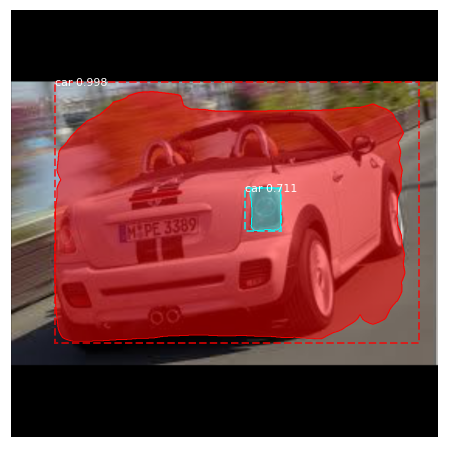

In [35]:
import random
from mrcnn import visualize
image_id = random.choice(test_set.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask = load_image_gt(test_set, cfg, image_id)
#visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, train_set.class_names, figsize=(8, 8))
results = model.detect([original_image], verbose=1)

r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'],test_set.class_names, r['scores'], ax=get_ax())